In [1]:
"""
This code belongs to the paper:
-- YC Mathpati, KS More, T Tripura, R Nayek, S Chakraborty (2023)
   MAntRA: A framework for model agnostic reliability analysis
   
-- This code is for 21 Storey building.
"""

'\nThis code belongs to the paper:\n-- YC Mathpati, KS More, T Tripura, R Nayek, S Chakraborty (2023)\n   MAntRA: A framework for model agnostic reliability analysis\n   \n-- This code is for 21 Storey building.\n'

# Diffusion 21

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as LA
from sklearn.metrics import mean_squared_error as MSE

"""
The Dictionary creation part:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
"""
def library(xt, polyn, harmonic):
    if polyn == 0:
        polyn = 1
    
    # The polynomial is (x1 + x2)^p, with p is the order
    # poly order 0
    ind = 0
    n = len(xt[0])
    D = np.ones([n,1])
    
    if polyn >= 1:
        # poly order 1
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(xt[i,:])
            D = np.append(D, new, axis=1)
     
    if polyn >= 2: 
        # ploy order 2
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                ind = ind+1
                new = np.multiply(xt[i,:], xt[j,:])
                new = np.vstack(new)
                D = np.append(D, new, axis=1) 
    
    if polyn >= 3:    
        # ploy order 3
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    ind = ind+1
                    new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                    new = np.vstack(new)
                    D = np.append(D, new, axis=1) 
    
    if polyn >= 4:
        # ploy order 4
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in range(k,len(xt)):
                        ind = ind+1
                        new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                        new = np.multiply(new, xt[l,:])
                        new = np.vstack(new)
                        D = np.append(D, new, axis=1) 
    
    if polyn >= 5:
        # ploy order 5
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            ind = ind+1
                            new = np.multiply(xt[i,:], xt[j,:])
                            new = np.multiply(new, xt[k,:])
                            new = np.multiply(new, xt[l,:])
                            new = np.multiply(new, xt[m,:])
                            new = np.vstack(new)
                            D = np.append(D, new, axis=1) 
    
    if polyn >= 6:
        # ploy order 6
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            for n in  range(m,len(xt)):
                                ind = ind+1
                                new = np.multiply(xt[i,:], xt[j,:])
                                new = np.multiply(new, xt[k,:])
                                new = np.multiply(new, xt[l,:])
                                new = np.multiply(new, xt[m,:])
                                new = np.multiply(new, xt[n,:])
                                new = np.vstack(new)
                                D = np.append(D, new, axis=1) 
    
    
    # for the modulus operator
    for i in range(len(xt)):
        ind = ind+1
        new = np.vstack(abs(xt[i,:]))
        D = np.append(D, new, axis=1)
      
    # for the tensor operator
    for i in range(len(xt)):
        for j in  range(len(xt)):
            ind = ind+1
            new = np.multiply(xt[i,:],abs(xt[j,:]))
            new = np.vstack(new)
            D = np.append(D, new, axis=1)
            
    if harmonic == 1:
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.sin(xt[i,:]))
            D = np.append(D, new, axis=1)

        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.cos(xt[i,:]))
            D = np.append(D, new, axis=1)
            
    ind = len(D[0])
    
    return D, ind

In [38]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.0001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    y7 = []
    y8 = []
    xz1 = []
    xz2 = []
    xz3 = []
    xzs11 = []
    xzs22 = []
    xzs33 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
  
        y1.append(x[-1,:])     # Displacement
        y2.append(x[-2,:])      
        y3.append(x[-3,:])     # Displacement
        y4.append(x[-4,:])
        y5.append(x[-5,:])
        y6.append(x[-6,:])
        y7.append(x[-7,:])
        y8.append(x[-8,:])
        

        zint1 = x[-1,0:-1]
        xfinal1 = x[-1,1:] 
        xmz1 = (xfinal1 - zint1)
        
        zint2 = x[-3, 0:-1]
        xfinal2 = x[-3, 1:] 
        xmz2 = (xfinal2 - zint2) 
        
        zint3 = x[-5, 0:-1]
        xfinal3 = x[-5, 1:] 
        xmz3 = (xfinal3 - zint3) 
        
        xz1.append(xmz1)
        xz2.append(xmz2)
        xz3.append(xmz3)
        
        xmzsq11 = np.multiply(xmz1, xmz1)
        xzs11.append(xmzsq11)
        
        xmzsq22 = np.multiply(xmz2, xmz2)
        xzs22.append(xmzsq22)
        
        xmzsq33 = np.multiply(xmz3, xmz3)
        xzs33.append(xmzsq33)
        
    xz1 = pow(dt,-1)*np.mean(np.array(xz1), axis = 0)
    xz2 = pow(dt,-1)*np.mean(np.array(xz2), axis = 0)
    xz3 = pow(dt,-1)*np.mean(np.array(xz3), axis = 0)

    xzs11 = pow(dt,-1)*np.mean(np.array(xzs11), axis = 0)
    xzs22 = pow(dt,-1)*np.mean(np.array(xzs22), axis = 0)
    xzs33 = pow(dt,-1)*np.mean(np.array(xzs33), axis = 0) 

    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    y7 = np.array(y7)
    y8 = np.array(y8)
    
    time = t[0:-1]
    return xz1, xz2, xz3, xzs11, xzs22, xzs33, y1, y2, y3, y4, y5, y6, y7, y8, time

In [39]:
T = 1
dof = 21
x_initial = np.zeros(2*dof)

In [41]:
xz1, xz2, xz3, xzs11, xzs22, xzs33, y1, y2, y3, y4, y5, y6, y7, y8, time_ = M_DOF_sys(x_initial, dof, T)

In [43]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1], y3[j,0:-1], y4[j,0:-1], y5[j,0:-1], y6[j,0:-1], y7[j,0:-1], y8[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)

In [44]:
xdts = xzs11
D = Dictionary

In [ ]:
Dict = D.reshape(-1,order='F')

In [47]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[8.0],[11.0],[25.0],[30.0],[34.0],[36.0],[40.0],[44.0],[50.0],[68.0],[70.0],[74.0],[81.0]]), 'Value': matlab.double([[1.0047808356643277],[0.06833581299706867],[0.8638284659695521],[-2.041101286100316],[-2.362997691764869],[0.15396010652952816],[-0.22035578525958419],[0.33357230552705275],[-0.2679695239600998],[0.300930393053831],[-0.2804027566179254],[-0.2904220501070378],[1.3161912608157038],[-22.39637936251321]])}


In [49]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1.]


In [50]:
import warnings
import math
import numpy as np
import scipy as sp
import sympy as smp
from scipy import stats
from numpy import linalg as la
import matplotlib.pyplot as plt
from numpy.random import gamma
from scipy.special import loggamma

def Variational_Bayes_Code(X, y, initz0, tol, verbosity):

    if (len(X) == 0 or len(y) == 0):
        raise Exception('X and or y is missing')
        
    if (len(X) != len(y)):
        raise Exception('Number of observations do not match')
        
    # X = stats.zscore(X, ddof = 1)         
    # X = np.c_[np.ones(len(X)),X]
    # X = np.c_[np.ones(len(X)),X]          
    # y = y - np.mean(y)
    N = len(X)
    # Prior parameters of noise variance (Inverse Gamma dist)
    A = 1e-4
    B = 1e-4
    vs = 10
    tau0 = 1000
    
    if (len(initz0) == 0):
        raise Exception('No initial value of z found')
    else:
        p0 = expit(-0.5*(np.sqrt(N)))       
        
        # Adding the intercept indicator variable (slightly less than 1 to prevent log(0) values) 
        # initz = np.hstack((1,initz0))  
        initz = initz0

        DS,LLcvg  = run_VB2(X, y, vs, A, B, tau0, p0, initz, tol, verbosity)    
        # This is function which will come first
        
    out_vb   = DS
    a = DS['zmean'] > 0.5
    count = 0
    modelIdx = []
    for i in a:
        if i == True:
            modelIdx.append(count)
        count += 1
            
    modelIdx = np.setdiff1d(modelIdx,0)
    out_vb['modelIdx'] = modelIdx-1
    out_vb['Zmed'] = DS['zmean'][modelIdx]
    out_vb['Wsel'] = DS['wmean'][modelIdx]
    out_vb['Wcov'] = DS['wCOV'][modelIdx, modelIdx]
    out_vb['sig2'] = DS['sig2']
    
    return out_vb

DS = {}
def run_VB2(Xc, yc, vs, A, B, tau0, p0, initz, tol, verbosity):
    """This function is the implementation of VB from John T. Ormerod paper (2014)
       This implementation uses slab scaling by noise variance
       vs    : treated as a constant
       A,B   : constants of the IG prior over noise variance
       tau0  : Expected value of (sigma^{-2})
       p0    : inclusion probablility
       initz : Initial value of z
       Xc    : Centered and standardized dictionary except the first column
       yc    : Centered observations """
    
    Lambda    = logit(p0)
    iter_     = 0
    max_iter  = 100
    LL        = np.zeros(max_iter)        
    zm        = np.reshape(initz,(-1))            
    taum      = tau0                      
    invVs     = 1/vs
    
    X = Xc
    y = yc
    XtX = (X.T) @ X
    XtX = 0.5*(XtX + (XtX).T)
    Xty = (X.T) @ y                 
    yty = (y.T) @ y

    eyep = np.eye(len(XtX))
    [N,p] = X.shape
    allidx = np.arange(p)
    zm[0] = 1                                                                   # Always include the intercept 
    Abar    = (A + 0.5*N + 0.5*p)
    converged = 0
    
    while (converged==0):
        if (iter_==100):
            break
        
        Zm       = np.diag(zm)
        Omg      = (np.reshape(zm,(-1,1)) @ np.reshape(zm,(1,-1))) + (Zm @ (eyep-Zm))
        # Update the mean and covariance of the coefficients given mean of z
        term1    = XtX * Omg                                                       # elementwisw multiplication
        invSigma = taum * (term1 + invVs * eyep)
        invSigma = 0.5*(invSigma + invSigma.T)                                     # symmetric
        Sigma    = la.inv(invSigma) @ eyep
        mu       = taum * (Sigma @ Zm @ Xty)                                       # @ ---> matrix multiplication
        
        # Update tau related to sigma
        term2    = 2 * Xty @ Zm @ mu
        term3    =  np.reshape(mu,(len(initz0),1)) @ np.reshape(mu,(1,len(initz0)))+ Sigma
        term4    = yty - term2 + np.trace((term1 + invVs * eyep) @ term3)    
        s        = B + 0.5*term4
        
        if s<0:
            warnings.warn('s turned out be less than 0. Taking absolute value')
            s = B + 0.5*abs(term4)
        
        taum     = Abar / s
        zstr   = zm

        order   = np.setdiff1d(np.random.permutation(p), 0, assume_unique=True)
        for j in order: 
            muj     = mu[j]                            
            sigmaj  = Sigma[j,j]
            
            remidx  = np.setdiff1d(allidx,j)
            mu_j    = mu[remidx]
            Sigma_jj= Sigma[remidx,j]
            etaj    = (Lambda - 0.5 * taum * ((muj**2 + sigmaj) * XtX[j,j]) 
                       + taum * np.reshape(X[:,j],(1,-1)) @ (np.reshape(y,(-1,1))*muj 
                        -X[:,remidx] @ np.diag(zstr[remidx]) @ ((mu_j * muj + Sigma_jj).reshape(-1,1))))
            zstr[j] = expit(etaj)
            
        zm = zstr
        
        # Calculate marginal log-likelihood
        
        LL[iter_] = ( 0.5*p 
                    - 0.5*N*np.log(2*np.pi) 
                    + 0.5*p*np.log(invVs) 
                    + A*np.log(B)
                    - loggamma(A)
                    + loggamma(Abar) 
                    - Abar*np.log(s)
                    + 0.5*np.log(la.det(Sigma))
                    + np.nansum(zm*(np.log(p0) - np.log(zm))) 
                    + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
        
        if(verbosity):
            print(f'Iteration = {iter_}  log(Likelihood) = {LL[iter_]}')
        
        if(iter_>1):
            cvg = LL[iter_] - LL[iter_-1]
            
            if (cvg < 0 and verbosity):
                print('OOPS!  log(like) decreasing!!')
            elif (cvg<tol or iter_> max_iter):
                converged = 1
                LL = LL[0:iter_]
                
        iter_    = iter_ + 1
    DS['zmean'] = zm
    DS['wmean'] = mu
    DS['wCOV'] = Sigma
    DS['sig2'] = 1/taum
    LLcvg    = LL[-1]
    return DS, LLcvg
    
def logit(C):
    logitC = np.log(C) - np.log(1-C)
    return logitC

def expit(C):
    expitC = 1./(1 + np.exp(-C))
    return expitC

In [51]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_3928/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_3928/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_3928/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))


Iteration = 0  log(Likelihood) = 8387.552411317283


C:\Users\USER\AppData\Local\Temp/ipykernel_3928/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_3928/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = 8441.432533370387
Iteration = 2  log(Likelihood) = 8441.434425858524
Iteration = 3  log(Likelihood) = 8441.434425979962
{'zmean': array([1.00000000e+00, 6.19655993e-29, 1.74923742e-22, 1.57723171e-28,
       1.75808444e-22, 2.92723714e-31, 1.75908353e-22, 3.10614431e-28,
       1.75881470e-22, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       5.82647159e-44, 0.00000000e+00, 5.73644207e-43, 0.00000000e+00,
       6.06168578e-42, 3.39127099e-27, 1.81202831e-22, 1.23582169e-24,
       1.80856143e-22, 5.09325308e-24, 1.81014186e-22, 8.40388378e-24,
       1.80920070e-22, 1.84830233e-22, 1.92766776e-22, 1.87347314e-22,
       1.92779380e-22, 1.85110074e-22, 1.92793198e-22, 1.87674819e-22,
       1.92807126e-22, 4.06681047e-24, 1.84392629e-22, 1.23362828e-26,
       1.84695628e-22, 5.17318959e-24, 1.85058332e-22, 4.59844239e-24,
       1.85792432e-22, 1.85952284e-22, 1.92779263e-22, 1.87434494e-22,
       1.92784495e-22, 1.86063466e-22, 1.92797615e-22, 1


1.003521987767179


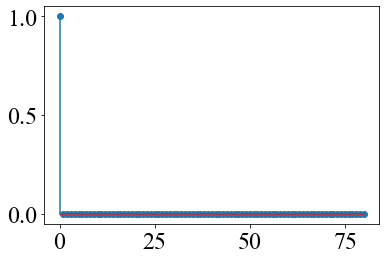

In [53]:
zmean21 = DS['zmean']
wmean21 = DS['wmean']
zmean21[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean21)
wmean21[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean21[0]))

# Diffusion 20

In [26]:
xdts = xzs22

In [27]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[3.0],[7.0],[11.0],[14.0],[22.0],[33.0],[57.0],[64.0],[73.0]]), 'Value': matlab.double([[1.0091846008703866],[2.429582323364784],[2.330516849804251],[1.330512004452653],[0.014250350260624805],[-0.07881647569388553],[-75.37782043650094],[-2.1383648735396967],[0.445369865427977],[-0.7637924306420544]])}


In [28]:
print(abs(DMOut['Value'][0][0]))

1.0091846008703866


In [29]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [30]:


X = D
y = xdts
initz0 = initz0
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

C:\Users\USER\AppData\Local\Temp/ipykernel_3928/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_3928/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_3928/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))


Iteration = 0  log(Likelihood) = 7992.116701362584


C:\Users\USER\AppData\Local\Temp/ipykernel_3928/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_3928/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = 8052.8781108596795
Iteration = 2  log(Likelihood) = 8052.8793215155765
Iteration = 3  log(Likelihood) = 8052.879321593269
{'zmean': array([1.00000000e+00, 2.29600830e-50, 8.78612670e-23, 6.04666528e-41,
       9.06022906e-23, 3.35181974e-38, 9.41734261e-23, 3.30423442e-45,
       9.62959431e-23, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       3.00316964e-46, 1.00000000e+00, 5.06772138e-45, 0.00000000e+00,
       6.75275797e-44, 2.09032484e-38, 1.76221634e-22, 6.78521108e-28,
       1.76697287e-22, 4.02364418e-26, 1.77038786e-22, 2.66788400e-26,
       1.76510944e-22, 1.63624761e-22, 1.91884096e-22, 1.70012298e-22,
       1.91925416e-22, 1.66577351e-22, 1.91983017e-22, 1.69975550e-22,
       1.92036644e-22, 8.12332012e-27, 1.78866716e-22, 6.94266340e-32,
       1.80586138e-22, 4.93378592e-26, 1.81902980e-22, 5.65387871e-25,
       1.81982903e-22, 1.65716879e-22, 1.91925759e-22, 1.71582246e-22,
       1.91946805e-22, 1.67024696e-22, 1.91990983e-22,


1.0015403079287326


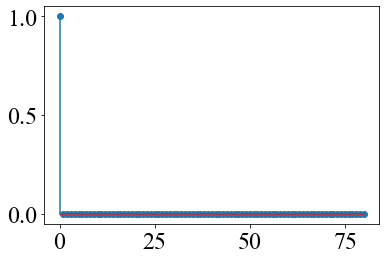

In [33]:
zmean20 = DS['zmean']
wmean20 = DS['wmean']
zmean20[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean20)
wmean20[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean20[0]))

# Diffusion 19

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.0001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run
    
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    y7 = []
    y8 = []
    y9 = []
    y10 = []
    
    xz2 = []
    xz3 = []
    xz4 = []
    xz5 = []
    
    xzs22 = []
    xzs33 = []
    xzs44 = []
    xzs55 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        if ensemble%50==0:
            print(ensemble)
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            

        y3.append(x[-3,:])
        y4.append(x[-4,:])
        y5.append(x[-5,:])     # Displacement
        y6.append(x[-6,:])
        y7.append(x[-7,:])     # Displacement
        y8.append(x[-8,:])
        y9.append(x[-9,:])
        y10.append(x[-10,:])
        
        zint2 = x[-3, 0:-1]
        xfinal2 = x[-3, 1:] 
        xmz2 = (xfinal2 - zint2) 
        
        zint3 = x[-5, 0:-1]
        xfinal3 = x[-5, 1:] 
        xmz3 = (xfinal3 - zint3) 
                  
        zint4 = x[-7, 0:-1]
        xfinal4 = x[-7, 1:] 
        xmz4 = (xfinal4 - zint4)
        
        zint5 = x[-9, 0:-1]
        xfinal5 = x[-9, 1:] 
        xmz5 = (xfinal5 - zint5)
        
        xz2.append(xmz2)
        xz3.append(xmz3)
        xz4.append(xmz4)
        xz5.append(xmz5)
        
        xmzsq22 = np.multiply(xmz2, xmz2)
        xzs22.append(xmzsq22)
        
        xmzsq33 = np.multiply(xmz3, xmz3)
        xzs33.append(xmzsq33)
        
        xmzsq44 = np.multiply(xmz4, xmz4)
        xzs44.append(xmzsq44)
        
        xmzsq55 = np.multiply(xmz5, xmz5)
        xzs55.append(xmzsq55)
        
    
    xz2 = pow(dt,-1)*np.mean(np.array(xz2), axis = 0)
    xz3 = pow(dt,-1)*np.mean(np.array(xz3), axis = 0)
    xz4 = pow(dt,-1)*np.mean(np.array(xz4), axis = 0)
    xz5 = pow(dt,-1)*np.mean(np.array(xz5), axis = 0)

    xzs22 = pow(dt,-1)*np.mean(np.array(xzs22), axis = 0)
    xzs33 = pow(dt,-1)*np.mean(np.array(xzs33), axis = 0) 
    xzs44 = pow(dt,-1)*np.mean(np.array(xzs44), axis = 0)
    xzs55 = pow(dt,-1)*np.mean(np.array(xzs55), axis = 0)

    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    y7 = np.array(y7)
    y8 = np.array(y8)
    y9 = np.array(y9)
    y10 = np.array(y10)

    time = t[0:-1]
    return xz2, xz3, xz4, xz5, xzs22, xzs33, xzs44, xzs55, y3, y4, y5, y6, y7, y8, y9, y10, time

In [4]:
import time
start = time.time()
xz2, xz3, xz4, xz5, xzs22, xzs33, xzs44, xzs55, y3, y4, y5, y6, y7, y8, y9, y10, time_ = M_DOF_sys(x_initial, dof, T)
end = time.time()
print()
TIMES = (end - start)/60
TIMES

0
50
100
150



23.946906622250875

In [5]:
startD = time.time()
# Expected Dictionary Creation:
libr = []
for j in range(len(y3)):
    data = np.row_stack((y3[j,0:-1], y4[j,0:-1], y5[j,0:-1], y6[j,0:-1], y7[j,0:-1], y8[j,0:-1], y9[j,0:-1], y10[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
print()
endD = time.time()
TIMED = (endD - startD)/60
TIMED

5.4169628063837685

In [17]:
xdts = xzs33
D = Dictionary

In [19]:
Dict = D.reshape(-1,order='F')
Dict.shape

(810000,)

In [20]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[10.0],[16.0],[66.0]]), 'Value': matlab.double([[0.9902377164137997],[0.03770046080843809],[0.1735159119427114],[-0.0015400485285265032]])}


In [21]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [24]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_6656/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_6656/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_6656/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))


Iteration = 0  log(Likelihood) = 8155.180473104376


C:\Users\USER\AppData\Local\Temp/ipykernel_6656/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_6656/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = 8215.956005206643
Iteration = 2  log(Likelihood) = 8215.957103866149
Iteration = 3  log(Likelihood) = 8215.957103936697
{'zmean': array([1.00000000e+00, 1.54630055e-43, 9.42941083e-23, 7.33794871e-38,
       9.74583618e-23, 1.66730121e-38, 1.00199488e-22, 5.63100705e-44,
       1.03734307e-22, 1.00000000e+00, 3.72808512e-45, 0.00000000e+00,
       4.69166888e-44, 0.00000000e+00, 6.59458148e-43, 1.00000000e+00,
       7.85266460e-42, 4.22169470e-31, 1.83787807e-22, 3.22605442e-25,
       1.83513435e-22, 1.32592253e-25, 1.82861108e-22, 9.80201669e-26,
       1.83270490e-22, 1.75015484e-22, 1.91961846e-22, 1.74522977e-22,
       1.92007668e-22, 1.77216968e-22, 1.92057804e-22, 1.74964933e-22,
       1.92117674e-22, 1.36470316e-24, 1.83749512e-22, 2.45515167e-29,
       1.84166144e-22, 4.95780034e-26, 1.83912709e-22, 3.13241019e-25,
       1.84113338e-22, 1.76132053e-22, 1.92007872e-22, 1.75221028e-22,
       1.92034955e-22, 1.77708344e-22, 1.92083260e-22, 1


0.9948396401906255


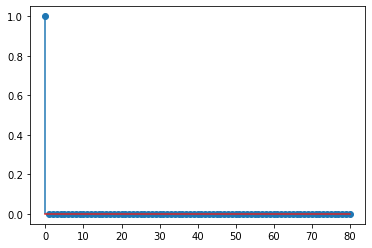

In [26]:
zmean19 = DS['zmean']
wmean19 = DS['wmean']
zmean19[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean19)
wmean19[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean19[0]))

# Diffusion 18

In [22]:
xdts = xzs44

In [23]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[2.0],[8.0],[10.0],[16.0],[32.0],[44.0]]), 'Value': matlab.double([[0.9829104962907175],[0.017684805522163984],[0.07839617389488117],[0.03304306719188128],[0.23271855134551253],[-6.470732580911453],[2.3007160450505806]])}


In [24]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [25]:
X = D
y = xdts
initz0 = initz0
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

C:\Users\USER\AppData\Local\Temp/ipykernel_8308/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_8308/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


Iteration = 0  log(Likelihood) = 8018.987274376397


C:\Users\USER\AppData\Local\Temp/ipykernel_8308/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_8308/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_8308/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = 8080.679696471821
Iteration = 2  log(Likelihood) = 8080.681013768153
Iteration = 3  log(Likelihood) = 8080.681013852754
{'zmean': array([1.00000000e+00, 1.03779976e-44, 7.55411416e-23, 9.40222294e-38,
       7.77392759e-23, 3.06960338e-40, 7.87570967e-23, 5.40915085e-44,
       8.02824102e-23, 1.00000000e+00, 5.17936668e-45, 0.00000000e+00,
       6.31803465e-44, 0.00000000e+00, 8.69437121e-43, 1.00000000e+00,
       1.05559104e-41, 1.99927977e-31, 1.83690765e-22, 3.35170308e-25,
       1.83756451e-22, 8.82442483e-26, 1.83517237e-22, 9.99653712e-26,
       1.83601217e-22, 1.70241695e-22, 1.91733040e-22, 1.70987811e-22,
       1.91778638e-22, 1.73431593e-22, 1.91827727e-22, 1.72618070e-22,
       1.91891685e-22, 2.90130405e-24, 1.83427429e-22, 8.63054035e-29,
       1.84414650e-22, 3.92052896e-26, 1.84569960e-22, 4.06852234e-25,
       1.84931014e-22, 1.71729764e-22, 1.91778589e-22, 1.71773995e-22,
       1.91807153e-22, 1.73787727e-22, 1.91856160e-22, 1


0.9951885440082008


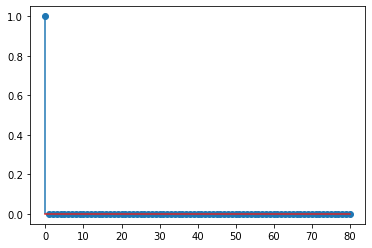

In [27]:
zmean18 = DS['zmean']
wmean18 = DS['wmean']
zmean18[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean18)
wmean18[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean18[0]))

# Diffusion 17

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.0001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run
    
    y7 = [] 
    y8 = []
    y9 = []
    y10 = []
    y11 = []
    y12 = []
    y13 = []
    y14 = []
    
    xz5 = []
    xz6 = []
    
    xzs55 = []
    xzs66 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y7.append(x[-7,:])
        y8.append(x[-8,:])
        y9.append(x[-9,:])         # Displacement
        y10.append(x[-10,:])
        y11.append(x[-11,:])       # Displacement
        y12.append(x[-12,:])
        y13.append(x[-13,:])
        y14.append(x[-14,:])
        
        zint5 = x[-9, 0:-1]        # Velocity
        xfinal5 = x[-9, 1:] 
        xmz5 = (xfinal5 - zint5)
        
        zint6 = x[-11, 0:-1]       # Velocity
        xfinal6 = x[-11, 1:] 
        xmz6 = (xfinal6 - zint6) 

        xz5.append(xmz5)
        xz6.append(xmz6)
        
        xmzsq55 = np.multiply(xmz5, xmz5)
        xzs55.append(xmzsq55)
        
        xmzsq66 = np.multiply(xmz6, xmz6)
        xzs66.append(xmzsq66)
        
    xz5 = pow(dt,-1)*np.mean(np.array(xz5), axis = 0)
    xz6 = pow(dt,-1)*np.mean(np.array(xz6), axis = 0)

    xzs55 = pow(dt,-1)*np.mean(np.array(xzs55), axis = 0)
    xzs66 = pow(dt,-1)*np.mean(np.array(xzs66), axis = 0)
    
    y7 = np.array(y7)
    y8 = np.array(y8)
    y9 = np.array(y9)
    y10 = np.array(y10)
    y11 = np.array(y11)
    y12 = np.array(y12)
    y13 = np.array(y13)
    y14 = np.array(y14)

    time = t[0:-1]
    return xz5, xz6, xzs55, xzs66, y7, y8, y9, y10, y11, y12, y13, y14, time

In [4]:
import time
start = time.time()
xz5, xz6, xzs55, xzs66, y7, y8, y9, y10, y11, y12, y13, y14, time_ = M_DOF_sys(x_initial, dof, T)
end = time.time()
print()
TIMES = (end - start)/60
TIMES

19.26790297428767

In [5]:
startD = time.time()
# Expected Dictionary Creation:
libr = []
for j in range(len(y7)):
    data = np.row_stack((y7[j,0:-1], y8[j,0:-1], y9[j,0:-1], y10[j,0:-1], y11[j,0:-1], y12[j,0:-1], y13[j,0:-1], y14[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
print()
endD = time.time()
TIMED = (endD - startD)/60
TIMED

5.142264139652252

In [8]:
xdts = xzs55
D = Dictionary

In [10]:
Dict = D.reshape(-1,order='F')
Dict.shape

(810000,)

In [11]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[7.0],[10.0],[14.0],[17.0],[22.0],[28.0],[42.0],[57.0]]), 'Value': matlab.double([[0.9856522615091673],[-5.7769476953383165],[0.1295363697115176],[0.03147533666869072],[1.3237589182557283],[-0.06687716389813055],[-2.401986797694255],[5.998084705771243],[1.1545312026326244]])}


In [12]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_2836/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_2836/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_2836/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))


Iteration = 0  log(Likelihood) = 8129.564433210797


C:\Users\USER\AppData\Local\Temp/ipykernel_2836/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_2836/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = 8190.447440717977
Iteration = 2  log(Likelihood) = 8190.448585261951
Iteration = 3  log(Likelihood) = 8190.448585334923
{'zmean': array([1.00000000e+00, 1.66730181e-38, 1.00199489e-22, 5.63100977e-44,
       1.03734308e-22, 2.38497996e-47, 1.08812790e-22, 7.00823867e-46,
       1.14856306e-22, 1.00000000e+00, 6.59458451e-43, 0.00000000e+00,
       7.85266801e-42, 1.00000000e+00, 8.85067209e-41, 0.00000000e+00,
       1.15476127e-39, 2.18517787e-30, 1.84028117e-22, 2.01876265e-25,
       1.84626712e-22, 6.20710671e-25, 1.85024029e-22, 4.08420179e-25,
       1.85656720e-22, 1.77838732e-22, 1.92118489e-22, 1.77997555e-22,
       1.92166453e-22, 1.77758927e-22, 1.92234496e-22, 1.76846624e-22,
       1.92304008e-22, 5.94449696e-26, 1.79520596e-22, 1.73123476e-31,
       1.80385458e-22, 1.75285252e-25, 1.81391716e-22, 2.99022588e-26,
       1.82201434e-22, 1.78036459e-22, 1.92166820e-22, 1.78703745e-22,
       1.92200499e-22, 1.78194702e-22, 1.92265936e-22, 1


0.9879038178340201


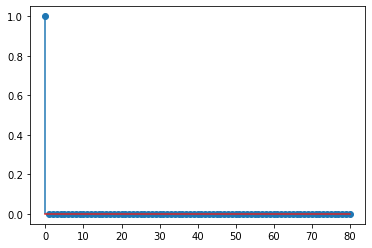

In [18]:
zmean17 = DS['zmean']
wmean17 = DS['wmean']
zmean17[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean17)
wmean17[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean17[0]))

# Diffusion 16

In [19]:
xdts = xzs66

In [20]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[10.0],[12.0],[17.0],[22.0],[68.0],[74.0]]), 'Value': matlab.double([[0.9986686919411943],[0.06107333439196258],[0.05112997931735707],[0.9286076095842783],[-0.16636177182023776],[0.24765371476749282],[-2.0997286353123954]])}


In [21]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_2836/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_2836/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_2836/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))


Iteration = 0  log(Likelihood) = 8044.968312515839


C:\Users\USER\AppData\Local\Temp/ipykernel_2836/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_2836/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = 8103.243982444097
Iteration = 2  log(Likelihood) = 8103.245354434419
Iteration = 3  log(Likelihood) = 8103.245354522414
{'zmean': array([1.00000000e+00, 1.66730462e-38, 1.00199492e-22, 5.63102250e-44,
       1.03734311e-22, 2.38498620e-47, 1.08812793e-22, 7.00825592e-46,
       1.14856309e-22, 1.00000000e+00, 6.59459868e-43, 1.00000000e+00,
       7.85268401e-42, 0.00000000e+00, 8.85068914e-41, 0.00000000e+00,
       1.00000000e+00, 2.18517969e-30, 1.84028117e-22, 2.01876328e-25,
       1.84626713e-22, 6.20710833e-25, 1.85024030e-22, 4.08420294e-25,
       1.85656720e-22, 1.77838733e-22, 1.92118489e-22, 1.77997556e-22,
       1.92166453e-22, 1.77758928e-22, 1.92234496e-22, 1.76846624e-22,
       1.92304008e-22, 5.94449916e-26, 1.79520596e-22, 1.73123640e-31,
       1.80385459e-22, 1.75285308e-25, 1.81391716e-22, 2.99022708e-26,
       1.82201434e-22, 1.78036460e-22, 1.92166820e-22, 1.78703746e-22,
       1.92200499e-22, 1.78194703e-22, 1.92265936e-22, 1


0.9957340261966928


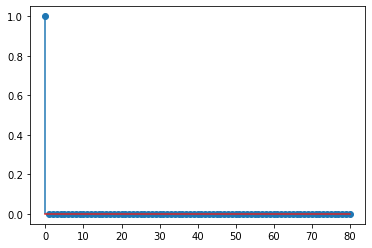

In [24]:
zmean16 = DS['zmean']
wmean16 = DS['wmean']
zmean16[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean16)
wmean16[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean16[0]))

# Diffusion 15

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.0001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run

    y11 = []  
    y12 = []
    y13 = []
    y14 = []
    y15 = []
    y16 = []
    y17 = []
    y18 = []
    
    xz7 = []
    xz8 = []
    
    xzs77 = []
    xzs88 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y11.append(x[-11,:])       
        y12.append(x[-12,:])
        y13.append(x[-13,:])       # Displacement
        y14.append(x[-14,:])
        y15.append(x[-15,:])       # Displacement     
        y16.append(x[-16,:])
        y17.append(x[-17,:])       
        y18.append(x[-18,:])

        
        zint7 = x[-13, 0:-1]        # Velocity
        xfinal7 = x[-13, 1:] 
        xmz7 = (xfinal7 - zint7)
        
        zint8 = x[-15, 0:-1]       # Velocity
        xfinal8 = x[-15, 1:] 
        xmz8 = (xfinal8 - zint8) 

        xz7.append(xmz7)
        xz8.append(xmz8)
        
        xmzsq77 = np.multiply(xmz7, xmz7)
        xzs77.append(xmzsq77)
        
        xmzsq88 = np.multiply(xmz8, xmz8)
        xzs88.append(xmzsq88)
        
    xz7 = pow(dt,-1)*np.mean(np.array(xz7), axis = 0)
    xz8 = pow(dt,-1)*np.mean(np.array(xz8), axis = 0)

    xzs77 = pow(dt,-1)*np.mean(np.array(xzs77), axis = 0)
    xzs88 = pow(dt,-1)*np.mean(np.array(xzs88), axis = 0)

    y11 = np.array(y11)
    y12 = np.array(y12)
    y13 = np.array(y13)
    y14 = np.array(y14)
    y15 = np.array(y15)
    y16 = np.array(y16)
    y17 = np.array(y17)
    y18 = np.array(y18)

    time = t[0:-1]
    return xz7, xz8, xzs77, xzs88, y11, y12, y13, y14, y15, y16, y17, y18, time

In [4]:
import time
start = time.time()
xz7, xz8, xzs77, xzs88, y11, y12, y13, y14, y15, y16, y17, y18, time_ = M_DOF_sys(x_initial, dof, T)
end = time.time()
print()
TIMES = (end - start)/60
TIMES

20.859048147996265

In [5]:
startD = time.time()
# Expected Dictionary Creation:
libr = []
for j in range(len(y11)):
    data = np.row_stack((y11[j,0:-1], y12[j,0:-1], y13[j,0:-1], y14[j,0:-1], y15[j,0:-1], y16[j,0:-1], y17[j,0:-1], y18[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
print()
endD = time.time()
TIMED = (endD - startD)/60
TIMED

5.4062581896781925

In [7]:
xdts = xzs77
D = Dictionary

In [9]:
Dict = D.reshape(-1,order='F')
Dict.shape

(810000,)

In [10]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[5.0],[10.0],[15.0],[16.0],[22.0],[25.0],[33.0],[36.0],[38.0],[62.0],[66.0],[76.0]]), 'Value': matlab.double([[0.9971517057741365],[-2.208784708696819],[0.08804737106915496],[1.1612198629373638],[0.03864005321671668],[-0.2710952538083632],[6.505291021506413],[-73.29105255806566],[0.16624307423825338],[-0.4635422765099648],[7.703174796530834],[-0.1503369728963538],[2.5409780686755505]])}


In [11]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [13]:
D.shape, initz0.shape

((10000, 81), (81,))

In [14]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_12052/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_12052/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


Iteration = 0  log(Likelihood) = 8057.727457392202


C:\Users\USER\AppData\Local\Temp/ipykernel_12052/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_12052/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_12052/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = 8121.055347164063
Iteration = 2  log(Likelihood) = 8121.056592107774
Iteration = 3  log(Likelihood) = 8121.056592187508
{'zmean': array([1.00000000e+00, 2.38498279e-47, 1.08812791e-22, 7.00824648e-46,
       1.14856307e-22, 1.16864720e-41, 1.22184239e-22, 3.25887782e-33,
       1.30987218e-22, 1.00000000e+00, 8.85067981e-41, 0.00000000e+00,
       1.15476222e-39, 0.00000000e+00, 1.92065014e-38, 1.00000000e+00,
       2.90409667e-37, 2.34453836e-33, 1.80551734e-22, 9.25262343e-27,
       1.81662247e-22, 7.32823104e-27, 1.82288102e-22, 1.94439752e-26,
       1.83150304e-22, 1.79650511e-22, 1.92315478e-22, 1.78270352e-22,
       1.92370788e-22, 1.79902835e-22, 1.92433630e-22, 1.78972834e-22,
       1.92503643e-22, 1.93707149e-26, 1.81594570e-22, 1.24594149e-30,
       1.82447273e-22, 4.54705237e-26, 1.82948301e-22, 1.25888745e-25,
       1.83677808e-22, 1.81259714e-22, 1.92371361e-22, 1.80092961e-22,
       1.92413956e-22, 1.81407174e-22, 1.92470487e-22, 1

In [16]:
np.diag(DS['wCOV'])

array([1.74548825e-05, 1.11451795e-01, 1.11451795e-01, 1.11451795e-01,
       1.11451795e-01, 1.11451795e-01, 1.11451795e-01, 1.11451795e-01,
       1.11451795e-01, 2.77630320e-03, 1.11451795e-01, 1.11451795e-01,
       1.11451795e-01, 1.11451795e-01, 1.11451795e-01, 2.82879175e-03,
       1.11451795e-01, 1.11451795e-01, 1.11451795e-01, 1.11451795e-01,
       1.11451795e-01, 1.11451795e-01, 1.11451795e-01, 1.11451795e-01,
       1.11451795e-01, 1.11451795e-01, 1.11451795e-01, 1.11451795e-01,
       1.11451795e-01, 1.11451795e-01, 1.11451795e-01, 1.11451795e-01,
       1.11451795e-01, 1.11451795e-01, 1.11451795e-01, 1.11451795e-01,
       1.11451795e-01, 1.11451795e-01, 1.11451795e-01, 1.11451795e-01,
       1.11451795e-01, 1.11451795e-01, 1.11451795e-01, 1.11451795e-01,
       1.11451795e-01, 1.11451795e-01, 1.11451795e-01, 1.11451795e-01,
       1.11451795e-01, 1.11451795e-01, 1.11451795e-01, 1.11451795e-01,
       1.11451795e-01, 1.11451795e-01, 1.11451795e-01, 1.11451795e-01,
      


0.9931591580867489


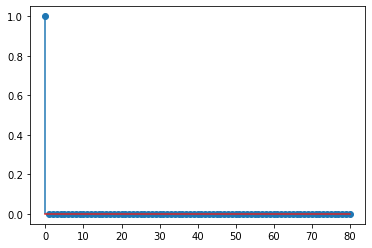

In [17]:
zmean15 = DS['zmean']
wmean15 = DS['wmean']
zmean15[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean15)
wmean15[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean15[0]))

# Diffusion 14

In [18]:
xdts = xzs88

In [19]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[12.0],[21.0],[29.0],[38.0],[39.0],[40.0],[48.0],[54.0],[66.0]]), 'Value': matlab.double([[0.9898238800188733],[0.1984746422085559],[-1.7640145233784053],[22.759960116207843],[0.16043836300211084],[4.804876679996905],[-0.5365290588344515],[2.621775577335877],[0.019734250831577486],[0.16141525748343863]])}


In [20]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [21]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_12052/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_12052/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_12052/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))


Iteration = 0  log(Likelihood) = 8210.289564420636


C:\Users\USER\AppData\Local\Temp/ipykernel_12052/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_12052/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = 8270.800493227316
Iteration = 2  log(Likelihood) = 8270.80184150347
Iteration = 3  log(Likelihood) = 8270.80184159064
{'zmean': array([1.00000000e+00, 2.38498558e-47, 1.08812792e-22, 7.00825419e-46,
       1.14856309e-22, 1.16864826e-41, 1.22184240e-22, 3.25887947e-33,
       1.30987219e-22, 0.00000000e+00, 8.85068743e-41, 1.00000000e+00,
       1.15476315e-39, 0.00000000e+00, 1.92065159e-38, 0.00000000e+00,
       2.90409869e-37, 2.34453956e-33, 1.80551734e-22, 9.25262531e-27,
       1.81662247e-22, 7.32823257e-27, 1.82288102e-22, 1.94439789e-26,
       1.83150305e-22, 1.79650512e-22, 1.92315478e-22, 1.78270352e-22,
       1.92370788e-22, 1.79902836e-22, 1.92433630e-22, 1.78972834e-22,
       1.92503643e-22, 1.93707185e-26, 1.81594570e-22, 1.24594197e-30,
       1.82447274e-22, 4.54705314e-26, 1.82948301e-22, 1.25888764e-25,
       1.83677808e-22, 1.81259714e-22, 1.92371361e-22, 1.80092961e-22,
       1.92413956e-22, 1.81407174e-22, 1.92470487e-22, 1.7


0.9910134166011874


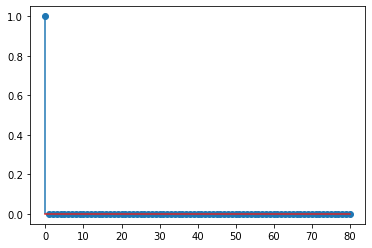

In [24]:
zmean14 = DS['zmean']
wmean14 = DS['wmean']
zmean14[np.where(np.diag(DS['wCOV'])>5e-5)] = 0
plt.stem(zmean14)
wmean14[np.where(np.diag(DS['wCOV'])>5e-5)] = 0
print()
print(np.sqrt(wmean14[0]))

# Diffusion 13

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.0001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run

    y15 = []
    y16 = []
    y17 = []
    y18 = []
    y19 = []  
    y20 = []
    y21 = []
    y22 = []
    
    xz9 = []
    xz10 = []
    
    xzs9 = []
    xzs10 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y15.append(x[-15,:])           
        y16.append(x[-16,:])
        y17.append(x[-17,:])       # Displacement 
        y18.append(x[-18,:])
        y19.append(x[-19,:])       # Displacement         
        y20.append(x[-20,:])
        y21.append(x[-21,:])           
        y22.append(x[-22,:])

        
        zint9 = x[-17, 0:-1]        # Velocity
        xfinal9 = x[-17, 1:] 
        xmz9 = (xfinal9 - zint9)
        
        zint10 = x[-19, 0:-1]       # Velocity
        xfinal10 = x[-19, 1:] 
        xmz10 = (xfinal10 - zint10) 

        xz9.append(xmz9)
        xz10.append(xmz10)
        
        xmzsq9 = np.multiply(xmz9, xmz9)
        xzs9.append(xmzsq9)
        
        xmzsq10 = np.multiply(xmz10, xmz10)
        xzs10.append(xmzsq10)
        
    xz9 = pow(dt,-1)*np.mean(np.array(xz9), axis = 0)
    xz10 = pow(dt,-1)*np.mean(np.array(xz10), axis = 0)

    xzs9 = pow(dt,-1)*np.mean(np.array(xzs9), axis = 0)
    xzs10 = pow(dt,-1)*np.mean(np.array(xzs10), axis = 0)

    y15 = np.array(y15)
    y16 = np.array(y16)
    y17 = np.array(y17)
    y18 = np.array(y18)
    y19 = np.array(y19)
    y20 = np.array(y20)
    y21 = np.array(y21)
    y22 = np.array(y22)

    time = t[0:-1]
    return xz9, xz10, xzs9, xzs10, y15, y16, y17, y18, y19, y20, y21, y22, time

In [4]:
import time
start = time.time()
xz9, xz10, xzs9, xzs10, y15, y16, y17, y18, y19, y20, y21, y22, time_ = M_DOF_sys(x_initial, dof, T)
end = time.time()
print()
TIMES = (end - start)/60

19.68596785068512

In [5]:
startD = time.time()
# Expected Dictionary Creation:
libr = []
for j in range(len(y15)):
    data = np.row_stack((y15[j,0:-1], y16[j,0:-1], y17[j,0:-1], y18[j,0:-1], y19[j,0:-1], y20[j,0:-1], y21[j,0:-1], y22[j,0:-1], ))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
print()
endD = time.time()
TIMED = (endD - startD)/60

5.870998533566793

In [16]:
xdts = xzs9
D = Dictionary

In [ ]:
Dict = D.reshape(-1,order='F')

In [19]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[14.0],[16.0],[17.0],[19.0],[36.0],[46.0],[48.0],[66.0],[76.0]]), 'Value': matlab.double([[0.9887861795793844],[0.16627148199625685],[0.020618577926066157],[0.6155326121163215],[0.9625336857653004],[0.18254947020856085],[2.955372415771637],[-5.0974527174618105],[0.016686824666610794],[0.2936330739605453]])}


In [20]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [21]:
import warnings
import math
import numpy as np
import scipy as sp
import sympy as smp
from scipy import stats
from numpy import linalg as la
import matplotlib.pyplot as plt
from numpy.random import gamma
from scipy.special import loggamma

def Variational_Bayes_Code(X, y, initz0, tol, verbosity):

    if (len(X) == 0 or len(y) == 0):
        raise Exception('X and or y is missing')
        
    if (len(X) != len(y)):
        raise Exception('Number of observations do not match')
        
    # X = stats.zscore(X, ddof = 1)         
    # X = np.c_[np.ones(len(X)),X]
    # X = np.c_[np.ones(len(X)),X]          
    # y = y - np.mean(y)
    N = len(X)
    # Prior parameters of noise variance (Inverse Gamma dist)
    A = 1e-4
    B = 1e-4
    vs = 10
    tau0 = 1000
    
    if (len(initz0) == 0):
        raise Exception('No initial value of z found')
    else:
        p0 = expit(-0.5*(np.sqrt(N)))       
        
        # Adding the intercept indicator variable (slightly less than 1 to prevent log(0) values) 
        # initz = np.hstack((1,initz0))  
        initz = initz0

        DS,LLcvg  = run_VB2(X, y, vs, A, B, tau0, p0, initz, tol, verbosity)    
        # This is function which will come first
        
    out_vb   = DS
    a = DS['zmean'] > 0.5
    count = 0
    modelIdx = []
    for i in a:
        if i == True:
            modelIdx.append(count)
        count += 1
            
    modelIdx = np.setdiff1d(modelIdx,0)
    out_vb['modelIdx'] = modelIdx-1
    out_vb['Zmed'] = DS['zmean'][modelIdx]
    out_vb['Wsel'] = DS['wmean'][modelIdx]
    out_vb['Wcov'] = DS['wCOV'][modelIdx, modelIdx]
    out_vb['sig2'] = DS['sig2']
    
    return out_vb

DS = {}
def run_VB2(Xc, yc, vs, A, B, tau0, p0, initz, tol, verbosity):
    """This function is the implementation of VB from John T. Ormerod paper (2014)
       This implementation uses slab scaling by noise variance
       vs    : treated as a constant
       A,B   : constants of the IG prior over noise variance
       tau0  : Expected value of (sigma^{-2})
       p0    : inclusion probablility
       initz : Initial value of z
       Xc    : Centered and standardized dictionary except the first column
       yc    : Centered observations """
    
    Lambda    = logit(p0)
    iter_     = 0
    max_iter  = 100
    LL        = np.zeros(max_iter)        
    zm        = np.reshape(initz,(-1))            
    taum      = tau0                      
    invVs     = 1/vs
    
    X = Xc
    y = yc
    XtX = (X.T) @ X
    XtX = 0.5*(XtX + (XtX).T)
    Xty = (X.T) @ y                 
    yty = (y.T) @ y

    eyep = np.eye(len(XtX))
    [N,p] = X.shape
    allidx = np.arange(p)
    zm[0] = 1                                                                   # Always include the intercept 
    Abar    = (A + 0.5*N + 0.5*p)
    converged = 0
    
    while (converged==0):
        if (iter_==100):
            break
        
        Zm       = np.diag(zm)
        Omg      = (np.reshape(zm,(-1,1)) @ np.reshape(zm,(1,-1))) + (Zm @ (eyep-Zm))
        # Update the mean and covariance of the coefficients given mean of z
        term1    = XtX * Omg                                                       # elementwisw multiplication
        invSigma = taum * (term1 + invVs * eyep)
        invSigma = 0.5*(invSigma + invSigma.T)                                     # symmetric
        Sigma    = la.inv(invSigma) @ eyep
        mu       = taum * (Sigma @ Zm @ Xty)                                       # @ ---> matrix multiplication
        
        # Update tau related to sigma
        term2    = 2 * Xty @ Zm @ mu
        term3    =  np.reshape(mu,(len(initz0),1)) @ np.reshape(mu,(1,len(initz0)))+ Sigma
        term4    = yty - term2 + np.trace((term1 + invVs * eyep) @ term3)    
        s        = B + 0.5*term4
        
        if s<0:
            warnings.warn('s turned out be less than 0. Taking absolute value')
            s = B + 0.5*abs(term4)
        
        taum     = Abar / s
        zstr   = zm

        order   = np.setdiff1d(np.random.permutation(p), 0, assume_unique=True)
        for j in order: 
            muj     = mu[j]                            
            sigmaj  = Sigma[j,j]
            
            remidx  = np.setdiff1d(allidx,j)
            mu_j    = mu[remidx]
            Sigma_jj= Sigma[remidx,j]
            etaj    = (Lambda - 0.5 * taum * ((muj**2 + sigmaj) * XtX[j,j]) 
                       + taum * np.reshape(X[:,j],(1,-1)) @ (np.reshape(y,(-1,1))*muj 
                        -X[:,remidx] @ np.diag(zstr[remidx]) @ ((mu_j * muj + Sigma_jj).reshape(-1,1))))
            zstr[j] = expit(etaj)
            
        zm = zstr
        
        # Calculate marginal log-likelihood
        
        LL[iter_] = ( 0.5*p 
                    - 0.5*N*np.log(2*np.pi) 
                    + 0.5*p*np.log(invVs) 
                    + A*np.log(B)
                    - loggamma(A)
                    + loggamma(Abar) 
                    - Abar*np.log(s)
                    + 0.5*np.log(la.det(Sigma))
                    + np.nansum(zm*(np.log(p0) - np.log(zm))) 
                    + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
        
        if(verbosity):
            print(f'Iteration = {iter_}  log(Likelihood) = {LL[iter_]}')
        
        if(iter_>1):
            cvg = LL[iter_] - LL[iter_-1]
            
            if (cvg < 0 and verbosity):
                print('OOPS!  log(like) decreasing!!')
            elif (cvg<tol or iter_> max_iter):
                converged = 1
                LL = LL[0:iter_]
                
        iter_    = iter_ + 1
    DS['zmean'] = zm
    DS['wmean'] = mu
    DS['wCOV'] = Sigma
    DS['sig2'] = 1/taum
    LLcvg    = LL[-1]
    return DS, LLcvg
    
def logit(C):
    logitC = np.log(C) - np.log(1-C)
    return logitC

def expit(C):
    expitC = 1./(1 + np.exp(-C))
    return expitC

In [22]:
D.shape, initz0.shape

((10000, 81), (81,))

In [23]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_6304/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_6304/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_6304/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))


Iteration = 0  log(Likelihood) = 8112.337119732089


C:\Users\USER\AppData\Local\Temp/ipykernel_6304/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_6304/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = 8169.272290926609
Iteration = 2  log(Likelihood) = 8169.273800162908
Iteration = 3  log(Likelihood) = 8169.273800260125
{'zmean': array([1.00000000e+00, 1.16864982e-41, 1.22184241e-22, 3.25888192e-33,
       1.30987221e-22, 9.86616149e-39, 1.34592433e-22, 2.33027039e-44,
       1.35176964e-22, 0.00000000e+00, 1.92065373e-38, 0.00000000e+00,
       2.90410169e-37, 1.00000000e+00, 4.44217154e-36, 1.00000000e+00,
       6.46953081e-35, 1.29416198e-30, 1.82677353e-22, 4.97366157e-25,
       1.83296324e-22, 4.53006545e-25, 1.83925622e-22, 6.80929001e-25,
       1.84377148e-22, 1.82892973e-22, 1.92510097e-22, 1.80538784e-22,
       1.92565631e-22, 1.81833385e-22, 1.92608333e-22, 1.81712534e-22,
       1.92643286e-22, 1.60113903e-24, 1.86719789e-22, 9.00455481e-28,
       1.87241150e-22, 9.93717754e-25, 1.87768366e-22, 5.86596108e-24,
       1.88050167e-22, 1.84488656e-22, 1.92565210e-22, 1.81705502e-22,
       1.92602939e-22, 1.83042489e-22, 1.92635672e-22, 1


0.9916373021096109


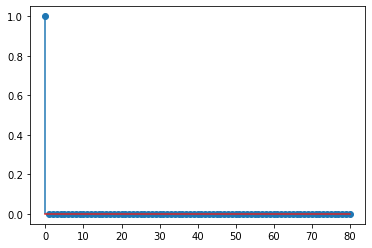

In [29]:
zmean13 = DS['zmean']
wmean13 = DS['wmean']
zmean13[np.where(np.diag(DS['wCOV'])>6.2e-4)] = 0
plt.stem(zmean13)
wmean13[np.where(np.diag(DS['wCOV'])>6.2e-4)] = 0
print()
print(np.sqrt(wmean13[0]))

# Diffusion 12

In [30]:
xdts = xzs10

In [31]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[7.0],[11.0],[16.0],[20.0],[26.0],[34.0],[36.0],[38.0],[53.0],[56.0],[60.0],[66.0],[68.0],[72.0]]), 'Value': matlab.double([[0.9865209229832042],[-3.3038173413435667],[0.36279558457966843],[0.20623872242677171],[0.14510573029054788],[2.1310335062326593],[-0.24825274089512409],[0.3334672657439126],[-0.13689974391090637],[-3.9553204569491047],[0.19512895868011365],[6.021401815032007],[-0.49036459275335337],[0.5573999164587363],[0.06858133601857361]])}


In [32]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [33]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_6304/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_6304/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


Iteration = 0  log(Likelihood) = 8202.34301251808


C:\Users\USER\AppData\Local\Temp/ipykernel_6304/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_6304/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_6304/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = 8255.128084408918
Iteration = 2  log(Likelihood) = 8255.130318847578
Iteration = 3  log(Likelihood) = 8255.130318990325
{'zmean': array([1.00000000e+00, 1.16865599e-41, 1.22184248e-22, 3.25889156e-33,
       1.30987227e-22, 9.86620563e-39, 1.34592438e-22, 2.33028442e-44,
       1.35176970e-22, 0.00000000e+00, 1.92066217e-38, 0.00000000e+00,
       2.90411351e-37, 0.00000000e+00, 4.44218818e-36, 1.00000000e+00,
       6.46955297e-35, 1.29416488e-30, 1.82677354e-22, 4.97366511e-25,
       1.83296325e-22, 4.53006872e-25, 1.83925623e-22, 6.80929460e-25,
       1.84377149e-22, 1.82892974e-22, 1.92510097e-22, 1.80538786e-22,
       1.92565631e-22, 1.81833387e-22, 1.92608333e-22, 1.81712535e-22,
       1.92643286e-22, 1.60113994e-24, 1.86719789e-22, 9.00456800e-28,
       1.87241151e-22, 9.93718378e-25, 1.87768367e-22, 5.86596353e-24,
       1.88050167e-22, 1.84488657e-22, 1.92565210e-22, 1.81705503e-22,
       1.92602939e-22, 1.83042490e-22, 1.92635672e-22, 1


0.9923615546549273


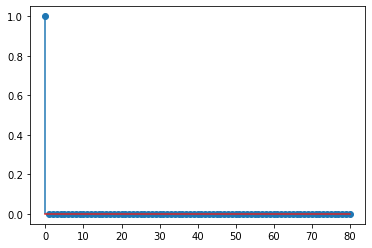

In [37]:
zmean12 = DS['zmean']
wmean12 = DS['wmean']
zmean12[np.where(np.diag(DS['wCOV'])>3e-5)] = 0
plt.stem(zmean12)
wmean12[np.where(np.diag(DS['wCOV'])>3e-5)] = 0
print()
print(np.sqrt(wmean12[0]))

# Diffusion 11

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.0001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run

    
    y19 = []  
    y20 = []
    y21 = []
    y22 = []
    y23 = []
    y24 = []
    y25 = []
    y26 = []
    
    xz11 = []
    xz12 = []
    
    xzs11 = []
    xzs12 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y19.append(x[-19,:])                
        y20.append(x[-20,:])
        y21.append(x[-21,:])       # Displacement    
        y22.append(x[-22,:])
        y23.append(x[-23,:])       # Displacement             
        y24.append(x[-24,:])
        y25.append(x[-25,:])                
        y26.append(x[-26,:])

        
        zint11 = x[-21, 0:-1]        # Velocity
        xfinal11 = x[-21, 1:] 
        xmz11 = (xfinal11 - zint11)
        
        zint12 = x[-23, 0:-1]       # Velocity
        xfinal12 = x[-23, 1:] 
        xmz12 = (xfinal12 - zint12) 

        xz11.append(xmz11)
        xz12.append(xmz12)
        
        xmzsq11 = np.multiply(xmz11, xmz11)
        xzs11.append(xmzsq11)
        
        xmzsq12 = np.multiply(xmz12, xmz12)
        xzs12.append(xmzsq12)
        
    xz11 = pow(dt,-1)*np.mean(np.array(xz11), axis = 0)
    xz12 = pow(dt,-1)*np.mean(np.array(xz12), axis = 0)

    xzs11 = pow(dt,-1)*np.mean(np.array(xzs11), axis = 0)
    xzs12 = pow(dt,-1)*np.mean(np.array(xzs12), axis = 0)

    y19 = np.array(y19)
    y20 = np.array(y20)
    y21 = np.array(y21)
    y22 = np.array(y22)
    y23 = np.array(y23)
    y24 = np.array(y24)
    y25 = np.array(y25)
    y26 = np.array(y26)

    time = t[0:-1]
    return xz11, xz12, xzs11, xzs12, y19, y20, y21, y22, y23, y24, y25, y26, time

In [4]:
import time
start = time.time()
xz11, xz12, xzs11, xzs12, y19, y20, y21, y22, y23, y24, y25, y26, time_ = M_DOF_sys(x_initial, dof, T)
end = time.time()
print()
TIMES = (end - start)/60
TIMES

21.792883121967314

In [5]:
startD = time.time()
# Expected Dictionary Creation:
libr = []
for j in range(len(y19)):
    data = np.row_stack((y19[j,0:-1], y20[j,0:-1], y21[j,0:-1], y22[j,0:-1], y23[j,0:-1], y24[j,0:-1], y25[j,0:-1], y26[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
print()
endD = time.time()
TIMED = (endD - startD)/60
TIMED

5.431408035755157

In [8]:
xdts = xzs11
D = Dictionary

In [10]:
Dict = D.reshape(-1,order='F')
Dict.shape

(810000,)

In [11]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[10.0],[16.0],[17.0],[41.0],[48.0],[56.0],[70.0],[81.0]]), 'Value': matlab.double([[0.9901238132330448],[0.16358128587352117],[0.016189251561629477],[0.5675585250561104],[-1.773903788783252],[10.063158752050205],[0.2885044675082408],[-0.09365842972938068],[-51.71240194306952]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1

In [15]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_6256/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_6256/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


Iteration = 0  log(Likelihood) = 8089.890506783656


C:\Users\USER\AppData\Local\Temp/ipykernel_6256/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_6256/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_6256/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = 8149.508447649354
Iteration = 2  log(Likelihood) = 8149.509790176409
Iteration = 3  log(Likelihood) = 8149.509790261411
{'zmean': array([1.00000000e+00, 9.86614786e-39, 1.34592431e-22, 2.33026606e-44,
       1.35176962e-22, 6.42392231e-55, 1.33629069e-22, 8.09374247e-59,
       1.35060882e-22, 1.00000000e+00, 4.44216641e-36, 0.00000000e+00,
       6.46952397e-35, 0.00000000e+00, 7.90599869e-34, 1.00000000e+00,
       9.64077304e-33, 3.67929343e-29, 1.86998014e-22, 3.41082197e-25,
       1.87665638e-22, 6.88072008e-25, 1.87849755e-22, 2.92630014e-25,
       1.88419802e-22, 1.83796049e-22, 1.92652434e-22, 1.84359067e-22,
       1.92672453e-22, 1.84743022e-22, 1.92690442e-22, 1.86054540e-22,
       1.92715021e-22, 1.38370236e-25, 1.83346666e-22, 1.15155430e-30,
       1.84178621e-22, 1.01182342e-26, 1.84862015e-22, 2.71684107e-26,
       1.85468473e-22, 1.83541191e-22, 1.92672486e-22, 1.84524276e-22,
       1.92674396e-22, 1.84670781e-22, 1.92685697e-22, 1


0.9899188099863844


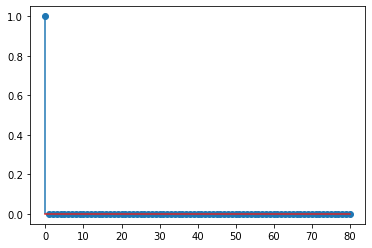

In [19]:
zmean11 = DS['zmean']
wmean11 = DS['wmean']
zmean11[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean11)
wmean11[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean11[0]))

# Diffusion 10

In [20]:
xdts = xzs12

In [21]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[4.0],[12.0],[16.0],[24.0],[32.0],[38.0],[41.0],[58.0],[73.0],[78.0]]), 'Value': matlab.double([[0.9819076967451932],[0.09140092181947508],[0.08689529174350885],[0.17319393019647966],[-0.007429900213746423],[-6.135093619475943],[-0.47396253646916475],[4.330390650614655],[5.6037754740846],[-0.6317503274629287],[-4.396070124654494]])}


In [22]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0.]


In [23]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_6256/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_6256/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_6256/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))


Iteration = 0  log(Likelihood) = 8025.978872508883


C:\Users\USER\AppData\Local\Temp/ipykernel_6256/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_6256/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = 8083.320257596184
Iteration = 2  log(Likelihood) = 8083.321853418955
Iteration = 3  log(Likelihood) = 8083.321853521626
{'zmean': array([1.00000000e+00, 9.86616726e-39, 1.34592433e-22, 2.33027223e-44,
       1.35176965e-22, 6.42394750e-55, 1.33629072e-22, 8.09377801e-59,
       1.35060885e-22, 0.00000000e+00, 4.44217372e-36, 1.00000000e+00,
       6.46953371e-35, 0.00000000e+00, 7.90600956e-34, 1.00000000e+00,
       9.64078503e-33, 3.67929641e-29, 1.86998014e-22, 3.41082311e-25,
       1.87665638e-22, 6.88072211e-25, 1.87849755e-22, 2.92630113e-25,
       1.88419802e-22, 1.83796049e-22, 1.92652434e-22, 1.84359067e-22,
       1.92672453e-22, 1.84743023e-22, 1.92690442e-22, 1.86054540e-22,
       1.92715021e-22, 1.38370288e-25, 1.83346667e-22, 1.15155544e-30,
       1.84178621e-22, 1.01182394e-26, 1.84862015e-22, 2.71684233e-26,
       1.85468474e-22, 1.83541192e-22, 1.92672486e-22, 1.84524276e-22,
       1.92674396e-22, 1.84670782e-22, 1.92685697e-22, 1


0.9931791546845723


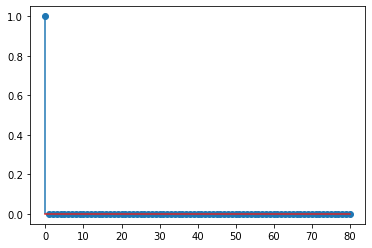

In [27]:
zmean10 = DS['zmean']
wmean10 = DS['wmean']
zmean10[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean10)
wmean10[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean10[0]))

# Diffusion 9

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000

    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.0001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run

    y23 = []
    y24 = []
    y25 = []
    y26 = []
    y27 = []
    y28 = []
    y29 = []
    y30 = []
    
    xz13 = []
    xz14 = []
    
    xzs13 = []
    xzs14 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y23.append(x[-23,:])                
        y24.append(x[-24,:])
        y25.append(x[-25,:])         # Displacement      
        y26.append(x[-26,:])
        y27.append(x[-27,:])         # Displacement       
        y28.append(x[-28,:])
        y29.append(x[-29,:])                
        y30.append(x[-30,:])

        
        zint13 = x[-25, 0:-1]        # Velocity
        xfinal13 = x[-25, 1:] 
        xmz13 = (xfinal13 - zint13)
        
        zint14 = x[-27, 0:-1]        # Velocity
        xfinal14 = x[-27, 1:] 
        xmz14 = (xfinal14 - zint14) 

        xz13.append(xmz13)
        xz14.append(xmz14)
        
        xmzsq13 = np.multiply(xmz13, xmz13)
        xzs13.append(xmzsq13)
        
        xmzsq14 = np.multiply(xmz14, xmz14)
        xzs14.append(xmzsq14)
        
    xz13 = pow(dt,-1)*np.mean(np.array(xz13), axis = 0)
    xz14 = pow(dt,-1)*np.mean(np.array(xz14), axis = 0)

    xzs13 = pow(dt,-1)*np.mean(np.array(xzs13), axis = 0)
    xzs14 = pow(dt,-1)*np.mean(np.array(xzs14), axis = 0)

    y23 = np.array(y23)
    y24 = np.array(y24)
    y25 = np.array(y25)
    y26 = np.array(y26)
    y27 = np.array(y27)
    y28 = np.array(y28)
    y29 = np.array(y29)
    y30 = np.array(y30)

    time = t[0:-1]
    return xz13, xz14, xzs13, xzs14, y23, y24, y25, y26, y27, y28, y29, y30, time

In [4]:
import time
start = time.time()
xz13, xz14, xzs13, xzs14, y23, y24, y25, y26, y27, y28, y29, y30, time_ = M_DOF_sys(x_initial, dof, T)
end = time.time()
print()
TIMES = (end - start)/60
TIMES

19.836947782834372

In [5]:
startD = time.time()
# Expected Dictionary Creation:
libr = []
for j in range(len(y23)):
    data = np.row_stack((y23[j,0:-1], y24[j,0:-1], y25[j,0:-1], y26[j,0:-1], y27[j,0:-1], y28[j,0:-1], y29[j,0:-1], y30[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
print()
endD = time.time()
TIMED = (endD - startD)/60
TIMED

5.348912453651428

In [6]:
xdts = xzs13
D = Dictionary

In [ ]:
Dict = D.reshape(-1,order='F')

In [9]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[3.0],[14.0],[16.0],[44.0],[50.0],[52.0],[57.0],[68.0],[70.0]]), 'Value': matlab.double([[0.9953315641323672],[-2.578008394338965],[0.0804756041164806],[0.11949452233700361],[4.374260860132828],[0.017914940504955748],[-0.1987055707212403],[5.830412920022909],[0.0989211611745288],[-0.25998742837331373]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [11]:
import warnings
import math
import numpy as np
import scipy as sp
import sympy as smp
from scipy import stats
from numpy import linalg as la
import matplotlib.pyplot as plt
from numpy.random import gamma
from scipy.special import loggamma

def Variational_Bayes_Code(X, y, initz0, tol, verbosity):

    if (len(X) == 0 or len(y) == 0):
        raise Exception('X and or y is missing')
        
    if (len(X) != len(y)):
        raise Exception('Number of observations do not match')
        
    # X = stats.zscore(X, ddof = 1)         
    # X = np.c_[np.ones(len(X)),X]
    # X = np.c_[np.ones(len(X)),X]          
    # y = y - np.mean(y)
    N = len(X)
    # Prior parameters of noise variance (Inverse Gamma dist)
    A = 1e-4
    B = 1e-4
    vs = 10
    tau0 = 1000
    
    if (len(initz0) == 0):
        raise Exception('No initial value of z found')
    else:
        p0 = expit(-0.5*(np.sqrt(N)))       
        
        # Adding the intercept indicator variable (slightly less than 1 to prevent log(0) values) 
        # initz = np.hstack((1,initz0))  
        initz = initz0

        DS,LLcvg  = run_VB2(X, y, vs, A, B, tau0, p0, initz, tol, verbosity)    
        # This is function which will come first
        
    out_vb   = DS
    a = DS['zmean'] > 0.5
    count = 0
    modelIdx = []
    for i in a:
        if i == True:
            modelIdx.append(count)
        count += 1
            
    modelIdx = np.setdiff1d(modelIdx,0)
    out_vb['modelIdx'] = modelIdx-1
    out_vb['Zmed'] = DS['zmean'][modelIdx]
    out_vb['Wsel'] = DS['wmean'][modelIdx]
    out_vb['Wcov'] = DS['wCOV'][modelIdx, modelIdx]
    out_vb['sig2'] = DS['sig2']
    
    return out_vb

DS = {}
def run_VB2(Xc, yc, vs, A, B, tau0, p0, initz, tol, verbosity):
    """This function is the implementation of VB from John T. Ormerod paper (2014)
       This implementation uses slab scaling by noise variance
       vs    : treated as a constant
       A,B   : constants of the IG prior over noise variance
       tau0  : Expected value of (sigma^{-2})
       p0    : inclusion probablility
       initz : Initial value of z
       Xc    : Centered and standardized dictionary except the first column
       yc    : Centered observations """
    
    Lambda    = logit(p0)
    iter_     = 0
    max_iter  = 100
    LL        = np.zeros(max_iter)        
    zm        = np.reshape(initz,(-1))            
    taum      = tau0                      
    invVs     = 1/vs
    
    X = Xc
    y = yc
    XtX = (X.T) @ X
    XtX = 0.5*(XtX + (XtX).T)
    Xty = (X.T) @ y                 
    yty = (y.T) @ y

    eyep = np.eye(len(XtX))
    [N,p] = X.shape
    allidx = np.arange(p)
    zm[0] = 1                                                                   # Always include the intercept 
    Abar    = (A + 0.5*N + 0.5*p)
    converged = 0
    
    while (converged==0):
        if (iter_==100):
            break
        
        Zm       = np.diag(zm)
        Omg      = (np.reshape(zm,(-1,1)) @ np.reshape(zm,(1,-1))) + (Zm @ (eyep-Zm))
        # Update the mean and covariance of the coefficients given mean of z
        term1    = XtX * Omg                                                       # elementwisw multiplication
        invSigma = taum * (term1 + invVs * eyep)
        invSigma = 0.5*(invSigma + invSigma.T)                                     # symmetric
        Sigma    = la.inv(invSigma) @ eyep
        mu       = taum * (Sigma @ Zm @ Xty)                                       # @ ---> matrix multiplication
        
        # Update tau related to sigma
        term2    = 2 * Xty @ Zm @ mu
        term3    =  np.reshape(mu,(len(initz0),1)) @ np.reshape(mu,(1,len(initz0)))+ Sigma
        term4    = yty - term2 + np.trace((term1 + invVs * eyep) @ term3)    
        s        = B + 0.5*term4
        
        if s<0:
            warnings.warn('s turned out be less than 0. Taking absolute value')
            s = B + 0.5*abs(term4)
        
        taum     = Abar / s
        zstr   = zm

        order   = np.setdiff1d(np.random.permutation(p), 0, assume_unique=True)
        for j in order: 
            muj     = mu[j]                            
            sigmaj  = Sigma[j,j]
            
            remidx  = np.setdiff1d(allidx,j)
            mu_j    = mu[remidx]
            Sigma_jj= Sigma[remidx,j]
            etaj    = (Lambda - 0.5 * taum * ((muj**2 + sigmaj) * XtX[j,j]) 
                       + taum * np.reshape(X[:,j],(1,-1)) @ (np.reshape(y,(-1,1))*muj 
                        -X[:,remidx] @ np.diag(zstr[remidx]) @ ((mu_j * muj + Sigma_jj).reshape(-1,1))))
            zstr[j] = expit(etaj)
            
        zm = zstr
        
        # Calculate marginal log-likelihood
        
        LL[iter_] = ( 0.5*p 
                    - 0.5*N*np.log(2*np.pi) 
                    + 0.5*p*np.log(invVs) 
                    + A*np.log(B)
                    - loggamma(A)
                    + loggamma(Abar) 
                    - Abar*np.log(s)
                    + 0.5*np.log(la.det(Sigma))
                    + np.nansum(zm*(np.log(p0) - np.log(zm))) 
                    + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
        
        if(verbosity):
            print(f'Iteration = {iter_}  log(Likelihood) = {LL[iter_]}')
        
        if(iter_>1):
            cvg = LL[iter_] - LL[iter_-1]
            
            if (cvg < 0 and verbosity):
                print('OOPS!  log(like) decreasing!!')
            elif (cvg<tol or iter_> max_iter):
                converged = 1
                LL = LL[0:iter_]
                
        iter_    = iter_ + 1
    DS['zmean'] = zm
    DS['wmean'] = mu
    DS['wCOV'] = Sigma
    DS['sig2'] = 1/taum
    LLcvg    = LL[-1]
    return DS, LLcvg
    
def logit(C):
    logitC = np.log(C) - np.log(1-C)
    return logitC

def expit(C):
    expitC = 1./(1 + np.exp(-C))
    return expitC

In [13]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_9824/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_9824/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


Iteration = 0  log(Likelihood) = 8194.486307619763


C:\Users\USER\AppData\Local\Temp/ipykernel_9824/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_9824/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_9824/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = 8251.31955597997
Iteration = 2  log(Likelihood) = 8251.32106427982
Iteration = 3  log(Likelihood) = 8251.321064376001
{'zmean': array([1.00000000e+00, 1.17116222e-40, 1.80720737e-22, 1.38085758e-39,
       1.80709647e-22, 1.34396546e-34, 1.82219860e-22, 8.45708960e-33,
       1.83459373e-22, 0.00000000e+00, 1.13152006e-33, 0.00000000e+00,
       1.83894332e-32, 1.00000000e+00, 2.62931241e-31, 1.00000000e+00,
       3.48434459e-30, 5.48593320e-31, 1.85478135e-22, 3.28405913e-26,
       1.86198797e-22, 3.84979798e-25, 1.86690656e-22, 1.48719801e-24,
       1.87700057e-22, 1.89382571e-22, 1.92840815e-22, 1.89521157e-22,
       1.92845450e-22, 1.89374754e-22, 1.92852085e-22, 1.90143503e-22,
       1.92855893e-22, 1.41085993e-26, 1.86627005e-22, 6.19329843e-30,
       1.87098278e-22, 7.85074174e-26, 1.88061080e-22, 4.06938270e-25,
       1.88857854e-22, 1.89740250e-22, 1.92845438e-22, 1.89959734e-22,
       1.92846975e-22, 1.89218370e-22, 1.92852197e-22, 1.9


0.997848155581177


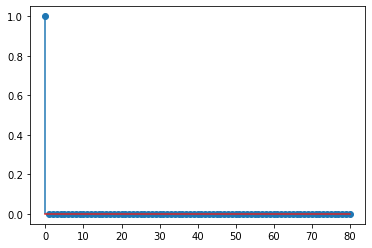

In [17]:
zmean11 = DS['zmean']
wmean11 = DS['wmean']
zmean11[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean11)
wmean11[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean11[0]))

# Diffusion 8

In [18]:
xdts = xzs14

In [19]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[8.0],[13.0],[35.0],[40.0],[43.0],[46.0],[64.0],[70.0],[72.0]]), 'Value': matlab.double([[1.0135729600244339],[-0.09887217872972166],[1.8562282044459353],[3.338671944468147],[-0.10557163554245222],[63.75725469730531],[0.40621090518523056],[-5.690473548031185],[0.16630413064128968],[-0.25557364028914115]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [21]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_9824/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_9824/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_9824/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))


Iteration = 0  log(Likelihood) = 8173.222017658047


C:\Users\USER\AppData\Local\Temp/ipykernel_9824/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_9824/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = 8231.275376270867
Iteration = 2  log(Likelihood) = 8231.276891251578
Iteration = 3  log(Likelihood) = 8231.27689134871
{'zmean': array([1.00000000e+00, 1.17116228e-40, 1.80720737e-22, 1.38085765e-39,
       1.80709647e-22, 1.34396551e-34, 1.82219860e-22, 8.45708984e-33,
       1.83459373e-22, 0.00000000e+00, 1.13152010e-33, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 2.62931247e-31, 0.00000000e+00,
       3.48434467e-30, 5.48593333e-31, 1.85478135e-22, 3.28405917e-26,
       1.86198797e-22, 3.84979801e-25, 1.86690656e-22, 1.48719801e-24,
       1.87700057e-22, 1.89382571e-22, 1.92840815e-22, 1.89521157e-22,
       1.92845450e-22, 1.89374754e-22, 1.92852085e-22, 1.90143503e-22,
       1.92855893e-22, 1.41085995e-26, 1.86627005e-22, 6.19329856e-30,
       1.87098278e-22, 7.85074182e-26, 1.88061080e-22, 4.06938273e-25,
       1.88857854e-22, 1.89740250e-22, 1.92845438e-22, 1.89959734e-22,
       1.92846975e-22, 1.89218370e-22, 1.92852197e-22, 1.


1.0088588591108991


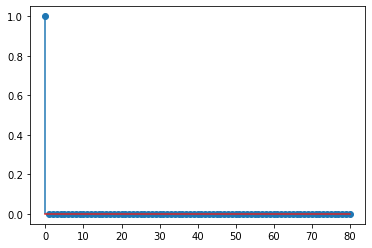

In [25]:
zmean10 = DS['zmean']
wmean10 = DS['wmean']
zmean10[np.where(np.diag(DS['wCOV'])>5e-3)] = 0
plt.stem(zmean10)
wmean10[np.where(np.diag(DS['wCOV'])>5e-3)] = 0
print()
print(np.sqrt(wmean10[0]))

# Diffusion 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.0001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run

    y27 = []
    y28 = []
    y29 = []
    y30 = []
    y31 = []
    y32 = []
    y33 = []
    y34 = []
    
    xz15 = []
    xz16 = []
    
    xzs15 = []
    xzs16 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y27.append(x[-27,:])               
        y28.append(x[-28,:])
        y29.append(x[-29,:])         # Displacement     
        y30.append(x[-30,:])
        y31.append(x[-31,:])         # Displacement       
        y32.append(x[-32,:])
        y33.append(x[-33,:])               
        y34.append(x[-34,:])

        
        zint15 = x[-29, 0:-1]        # Velocity
        xfinal15 = x[-29, 1:] 
        xmz15 = (xfinal15 - zint15)
        
        zint16 = x[-31, 0:-1]        # Velocity
        xfinal16 = x[-31, 1:] 
        xmz16 = (xfinal16 - zint16) 

        xz15.append(xmz15)
        xz16.append(xmz16)
        
        xmzsq15 = np.multiply(xmz15, xmz15)
        xzs15.append(xmzsq15)
        
        xmzsq16 = np.multiply(xmz16, xmz16)
        xzs16.append(xmzsq16)
        
    xz15 = pow(dt,-1)*np.mean(np.array(xz15), axis = 0)
    xz16 = pow(dt,-1)*np.mean(np.array(xz16), axis = 0)

    xzs15 = pow(dt,-1)*np.mean(np.array(xzs15), axis = 0)
    xzs16 = pow(dt,-1)*np.mean(np.array(xzs16), axis = 0)

    y27 = np.array(y27)
    y28 = np.array(y28)
    y29 = np.array(y29)
    y30 = np.array(y30)
    y31 = np.array(y31)
    y32 = np.array(y32)
    y33 = np.array(y33)
    y34 = np.array(y34)

    time = t[0:-1]
    return xz15, xz16, xzs15, xzs16, y27, y28, y29, y30, y31, y32, y33, y34, time

In [3]:
import time
start = time.time()
xz15, xz16, xzs15, xzs16, y27, y28, y29, y30, y31, y32, y33, y34, time_ = M_DOF_sys(x_initial, dof, T)
end = time.time()
print()
TIMES = (end - start)/60
TIMES

20.050825802485146

In [6]:
startD = time.time()
# Expected Dictionary Creation:
libr = []
for j in range(len(y27)):
    data = np.row_stack((y27[j,0:-1], y28[j,0:-1], y29[j,0:-1], y30[j,0:-1], y31[j,0:-1], y32[j,0:-1], y33[j,0:-1], y34[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
print()
endD = time.time()
TIMED = (endD - startD)/60
TIMED

5.349144506454468

In [18]:
xdts = xzs15
D = Dictionary

In [ ]:
Dict = D.reshape(-1,order='F')

In [21]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[3.0],[10.0],[12.0],[13.0],[22.0],[64.0],[67.0],[68.0],[70.0],[74.0],[78.0]]), 'Value': matlab.double([[1.0004032275859442],[-2.272613032658588],[0.11947487685297736],[0.013417110925138392],[0.8218598011363294],[-0.20657964253455396],[-3.3376659400769877],[-1.2427217047199552],[0.23149533892618385],[-0.2606254604006703],[4.727761285888223],[6.188931023747849]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [25]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_3228/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_3228/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_3228/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))


Iteration = 0  log(Likelihood) = 8088.407640553125


C:\Users\USER\AppData\Local\Temp/ipykernel_3228/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_3228/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = 8146.642464666629
Iteration = 2  log(Likelihood) = 8146.643916647268
Iteration = 3  log(Likelihood) = 8146.6439167410135
{'zmean': array([1.00000000e+00, 4.30463172e-41, 1.34930309e-22, 1.15179266e-33,
       1.46530857e-22, 8.66125559e-40, 1.56745779e-22, 4.74801633e-38,
       1.65335262e-22, 1.00000000e+00, 4.66488250e-31, 1.00000000e+00,
       4.82902926e-30, 0.00000000e+00, 5.04095181e-29, 0.00000000e+00,
       6.48906212e-28, 1.88104754e-31, 1.87017069e-22, 1.41420666e-25,
       1.87611408e-22, 6.35828435e-25, 1.88836383e-22, 4.56838900e-25,
       1.89534943e-22, 1.82501269e-22, 1.92645709e-22, 1.81744357e-22,
       1.92692808e-22, 1.83148847e-22, 1.92737580e-22, 1.82594495e-22,
       1.92772270e-22, 1.57548845e-24, 1.89618296e-22, 1.73131272e-28,
       1.89962253e-22, 6.98140203e-25, 1.90244415e-22, 4.33576466e-25,
       1.91110645e-22, 1.84529603e-22, 1.92693027e-22, 1.83908999e-22,
       1.92720708e-22, 1.85018572e-22, 1.92754335e-22, 


0.9975922728729321


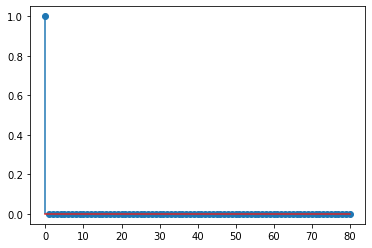

In [27]:
zmean7 = DS['zmean']
wmean7 = DS['wmean']
zmean7[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean7)
wmean7[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean7[0]))

# Diffusion 6

In [28]:
xdts = xzs16

In [29]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[7.0],[10.0],[12.0],[16.0],[23.0],[24.0],[26.0],[38.0],[72.0]]), 'Value': matlab.double([[0.9811435974614764],[-1.6860734313341124],[0.12000279381386893],[0.04198295454068612],[0.07839602636114816],[2.8290756293326247],[-0.2650175506186837],[1.3013933797444013],[-0.08931130839189087],[-0.05096229255460393]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [31]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_3228/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_3228/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_3228/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))


Iteration = 0  log(Likelihood) = 8082.745209854


C:\Users\USER\AppData\Local\Temp/ipykernel_3228/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_3228/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = 8141.2604512078815
Iteration = 2  log(Likelihood) = 8141.2618981047235
Iteration = 3  log(Likelihood) = 8141.261898196926
{'zmean': array([1.00000000e+00, 4.30463155e-41, 1.34930309e-22, 1.15179263e-33,
       1.46530857e-22, 8.66125526e-40, 1.56745779e-22, 4.74801617e-38,
       1.65335262e-22, 1.00000000e+00, 4.66488242e-31, 1.00000000e+00,
       4.82902917e-30, 0.00000000e+00, 5.04095174e-29, 1.00000000e+00,
       6.48906205e-28, 1.88104750e-31, 1.87017069e-22, 1.41420665e-25,
       1.87611408e-22, 6.35828432e-25, 1.88836383e-22, 4.56838898e-25,
       1.89534943e-22, 1.82501269e-22, 1.92645709e-22, 1.81744357e-22,
       1.92692808e-22, 1.83148847e-22, 1.92737580e-22, 1.82594495e-22,
       1.92772270e-22, 1.57548845e-24, 1.89618296e-22, 1.73131270e-28,
       1.89962253e-22, 6.98140199e-25, 1.90244415e-22, 4.33576463e-25,
       1.91110645e-22, 1.84529603e-22, 1.92693027e-22, 1.83908999e-22,
       1.92720708e-22, 1.85018572e-22, 1.92754335e-22,


0.991153920774372


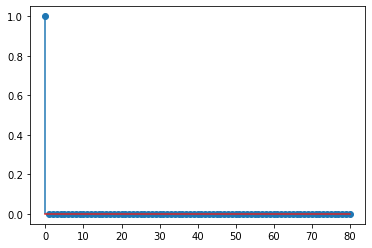

In [34]:
zmean6 = DS['zmean']
wmean6 = DS['wmean']
zmean6[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean6)
wmean6[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean6[0]))

# Diffusion 5

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.0001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run

    y31 = []
    y32 = []
    y33 = []
    y34 = []
    y35 = []
    y36 = []
    y37 = []
    y38 = []
    
    xz17 = []
    xz18 = []
    
    xzs17 = []
    xzs18 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y31.append(x[-31,:])            
        y32.append(x[-32,:])
        y33.append(x[-33,:])         # Displacement     
        y34.append(x[-34,:])
        y35.append(x[-35,:])         # 
        y36.append(x[-36,:])              
        y37.append(x[-37,:])
        y38.append(x[-38,:])
        
        zint17 = x[-33, 0:-1]        # Velocity
        xfinal17 = x[-33, 1:] 
        xmz17 = (xfinal17 - zint17)
        
        zint18 = x[-35, 0:-1]        # Velocity
        xfinal18 = x[-35, 1:] 
        xmz18 = (xfinal18 - zint18) 

        xz17.append(xmz17)
        xz18.append(xmz18)
        
        xmzsq17 = np.multiply(xmz17, xmz17)
        xzs17.append(xmzsq17)
        
        xmzsq18 = np.multiply(xmz18, xmz18)
        xzs18.append(xmzsq18)
        
    xz17 = pow(dt,-1)*np.mean(np.array(xz17), axis = 0)
    xz18 = pow(dt,-1)*np.mean(np.array(xz18), axis = 0)

    xzs17 = pow(dt,-1)*np.mean(np.array(xzs17), axis = 0)
    xzs18 = pow(dt,-1)*np.mean(np.array(xzs18), axis = 0)

    y31 = np.array(y31)
    y32 = np.array(y32)
    y33 = np.array(y33)
    y34 = np.array(y34)
    y35 = np.array(y35)
    y36 = np.array(y36)
    y37 = np.array(y37)
    y38 = np.array(y38)

    time = t[0:-1]
    return xz17, xz18, xzs17, xzs18, y31, y32, y33, y34, y35, y36, y37, y38, time

In [6]:
import time
start = time.time()
xz17, xz18, xzs17, xzs18, y31, y32, y33, y34, y35, y36, y37, y38, time_ = M_DOF_sys(x_initial, dof, T)
end = time.time()
print()
TIMES = (end - start)/60
TIMES

19.931245609124502

In [7]:
startD = time.time()
# Expected Dictionary Creation:
libr = []
for j in range(len(y31)):
    data = np.row_stack((y31[j,0:-1], y32[j,0:-1], y33[j,0:-1], y34[j,0:-1], y35[j,0:-1], y36[j,0:-1], y37[j,0:-1], y38[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
print()
endD = time.time()
TIMED = (endD - startD)/60
TIMED

5.3630574186642965

In [10]:
xdts = xzs17
D = Dictionary

In [12]:
Dict = D.reshape(-1,order='F')

(810000,)

In [13]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[6.0],[9.0],[10.0],[13.0],[23.0],[24.0],[40.0],[60.0],[66.0],[68.0]]), 'Value': matlab.double([[1.0016807730353334],[0.013072647804788002],[-0.6057617180505847],[0.06970042916874226],[2.098301547018932],[-3.6468439048969015],[0.5003017632994207],[-0.33739058061783406],[-1.578768031065037],[-0.2958160341481349],[0.38074201478010244]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [24]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_14004/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_14004/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_14004/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))


Iteration = 0  log(Likelihood) = 7960.982574775339


C:\Users\USER\AppData\Local\Temp/ipykernel_14004/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_14004/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = 8023.123711004848
Iteration = 2  log(Likelihood) = 8023.1247993069865
Iteration = 3  log(Likelihood) = 8023.124799377193
{'zmean': array([1.00000000e+00, 7.35667155e-38, 1.81228466e-22, 2.87396066e-35,
       1.81812949e-22, 1.43484038e-38, 1.82338938e-22, 4.04435653e-37,
       1.83870819e-22, 0.00000000e+00, 6.28325592e-29, 0.00000000e+00,
       8.85443598e-28, 0.00000000e+00, 1.22997406e-26, 0.00000000e+00,
       1.80050924e-25, 4.95982463e-31, 1.89214404e-22, 1.69017871e-26,
       1.89585909e-22, 3.70131384e-25, 1.90389877e-22, 3.02874425e-24,
       1.91325479e-22, 1.90167807e-22, 1.92842930e-22, 1.89629242e-22,
       1.92847279e-22, 1.89365434e-22, 1.92853356e-22, 1.89888722e-22,
       1.92860889e-22, 5.77979328e-27, 1.89304303e-22, 4.04223850e-29,
       1.89757181e-22, 4.13137652e-25, 1.90398479e-22, 1.13664855e-24,
       1.91065519e-22, 1.90441618e-22, 1.92847197e-22, 1.89714054e-22,
       1.92847796e-22, 1.89634121e-22, 1.92852848e-22, 


1.0254642808547945


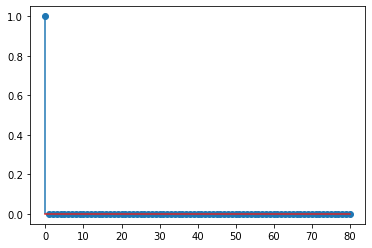

In [26]:
zmean5 = DS['zmean']
wmean5 = DS['wmean']
zmean5[np.where(np.diag(DS['wCOV'])>2e-5)] = 0
plt.stem(zmean5)
wmean5[np.where(np.diag(DS['wCOV'])>2e-5)] = 0
print()
print(np.sqrt(wmean5[0]))

# Diffusion 4

In [33]:
xdts = xzs18

In [34]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[14.0],[15.0],[28.0],[32.0],[39.0],[51.0],[62.0],[66.0],[67.0],[68.0],[70.0],[73.0]]), 'Value': matlab.double([[1.0032862048098872],[0.016253418600523338],[3.526279990043914],[7.123822225893731],[-7.45176274109187],[3.3795995416030897],[3.563219347335504],[2.4216844147637526],[-0.4365576745901151],[1.9891473198417193],[0.16654464890226187],[-0.2788701688923499],[0.26423980768792615]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [36]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_14004/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_14004/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_14004/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))


Iteration = 0  log(Likelihood) = 8189.139514218443


C:\Users\USER\AppData\Local\Temp/ipykernel_14004/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_14004/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = 8240.256414030031
Iteration = 2  log(Likelihood) = 8240.258340970531
Iteration = 3  log(Likelihood) = 8240.258341094088
{'zmean': array([1.00000000e+00, 7.35671202e-38, 1.81228468e-22, 2.87397382e-35,
       1.81812951e-22, 1.43484864e-38, 1.82338939e-22, 4.04437771e-37,
       1.83870820e-22, 0.00000000e+00, 6.28327046e-29, 0.00000000e+00,
       8.85445285e-28, 1.00000000e+00, 1.22997590e-26, 0.00000000e+00,
       1.80051119e-25, 4.95983984e-31, 1.89214405e-22, 1.69018116e-26,
       1.89585909e-22, 3.70131743e-25, 1.90389878e-22, 3.02874620e-24,
       1.91325480e-22, 1.90167808e-22, 1.92842930e-22, 1.89629242e-22,
       1.92847279e-22, 1.89365435e-22, 1.92853356e-22, 1.89888723e-22,
       1.92860889e-22, 5.77980261e-27, 1.89304303e-22, 4.04224813e-29,
       1.89757182e-22, 4.13138045e-25, 1.90398479e-22, 1.13664945e-24,
       1.91065520e-22, 1.90441618e-22, 1.92847197e-22, 1.89714054e-22,
       1.92847796e-22, 1.89634121e-22, 1.92852848e-22, 1


0.9952174826668923


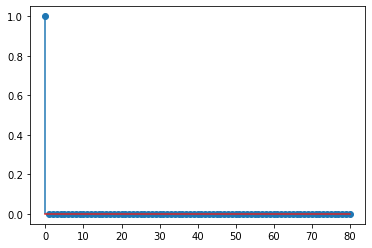

In [38]:
zmean4 = DS['zmean']
wmean4 = DS['wmean']
zmean4[np.where(np.diag(DS['wCOV'])>5e-5)] = 0
plt.stem(zmean4)
wmean4[np.where(np.diag(DS['wCOV'])>5e-5)] = 0
print()
print(np.sqrt(wmean4[0]))

# Diffusion 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.0001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run

    y35 = []
    y36 = []
    y37 = []
    y38 = []
    y39 = []
    y40 = []
    y41 = []
    y42 = []
    
    xz19 = []
    xz20 = []
    
    xzs19 = []
    xzs20 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            

        y35.append(x[-35,:])        
        y36.append(x[-36,:])              
        y37.append(x[-37,:])         # 
        y38.append(x[-38,:])
        y39.append(x[-39,:])         #
        y40.append(x[-40,:])
        y41.append(x[-41,:])        
        y42.append(x[-42,:])

        
        zint19 = x[-37, 0:-1]        # Velocity
        xfinal19 = x[-37, 1:] 
        xmz19 = (xfinal19 - zint19)
        
        zint20 = x[-39, 0:-1]        # Velocity
        xfinal20 = x[-39, 1:] 
        xmz20 = (xfinal20 - zint20) 

        xz19.append(xmz19)
        xz20.append(xmz20)
        
        xmzsq19 = np.multiply(xmz19, xmz19)
        xzs19.append(xmzsq19)
        
        xmzsq20 = np.multiply(xmz20, xmz20)
        xzs20.append(xmzsq20)
        
    xz19 = pow(dt,-1)*np.mean(np.array(xz19), axis = 0)
    xz20 = pow(dt,-1)*np.mean(np.array(xz20), axis = 0)

    xzs19 = pow(dt,-1)*np.mean(np.array(xzs19), axis = 0)
    xzs20 = pow(dt,-1)*np.mean(np.array(xzs20), axis = 0)

    y35 = np.array(y35)
    y36 = np.array(y36)
    y37 = np.array(y37)
    y38 = np.array(y38)
    y39 = np.array(y39)
    y40 = np.array(y40)
    y41 = np.array(y41)
    y42 = np.array(y42)

    time = t[0:-1]
    return xz19, xz20, xzs19, xzs20, y35, y36, y37, y38, y39, y40, y41, y42, time

In [ ]:
import time
start = time.time()
xz19, xz20, xzs19, xzs20, y35, y36, y37, y38, y39, y40, y41, y42, time_ = M_DOF_sys(x_initial, dof, T)

In [6]:
startD = time.time()
# Expected Dictionary Creation:
libr = []
for j in range(len(y35)):
    data = np.row_stack((y35[j,0:-1], y36[j,0:-1], y37[j,0:-1], y38[j,0:-1], y39[j,0:-1], y40[j,0:-1], y41[j,0:-1], y42[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
print()
endD = time.time()
TIMED = (endD - startD)/60
TIMED

5.393276619911194

In [7]:
xdts = xzs19
D = Dictionary

In [9]:
Dict = D.reshape(-1,order='F')

(810000,)

In [10]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[6.0],[13.0],[14.0],[16.0],[21.0],[27.0],[32.0],[38.0],[58.0]]), 'Value': matlab.double([[0.9904825352434724],[0.09945833063129142],[0.5275949022920007],[0.10789027323677451],[0.09969911004305786],[-1.253850794084635],[34.01246409006031],[1.042994287115904],[-0.4438090621349935],[-0.12908973332471121]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [13]:
D.shape, initz0.shape

((10000, 81), (81,))

In [14]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_12148/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_12148/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


Iteration = 0  log(Likelihood) = 8132.523757226134


C:\Users\USER\AppData\Local\Temp/ipykernel_12148/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_12148/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_12148/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = 8189.107744777155
Iteration = 2  log(Likelihood) = 8189.109242724637
Iteration = 3  log(Likelihood) = 8189.109242821238
{'zmean': array([1.00000000e+00, 4.35228783e-34, 1.86407851e-22, 2.08590066e-34,
       1.87572219e-22, 4.52267385e-34, 1.89351995e-22, 3.54356237e-34,
       1.91190886e-22, 0.00000000e+00, 1.40364011e-26, 0.00000000e+00,
       1.97031373e-25, 1.00000000e+00, 2.57159477e-24, 1.00000000e+00,
       3.05353908e-23, 1.29388386e-27, 1.90856511e-22, 5.27069995e-24,
       1.91596014e-22, 2.49168875e-24, 1.92086539e-22, 4.98654579e-24,
       1.92576719e-22, 1.91300789e-22, 1.92866757e-22, 1.91971730e-22,
       1.92869838e-22, 1.91736171e-22, 1.92872672e-22, 1.92216075e-22,
       1.92874421e-22, 3.11465128e-24, 1.91277355e-22, 8.96336033e-26,
       1.91716366e-22, 1.89265338e-24, 1.92145486e-22, 4.99544559e-24,
       1.92534582e-22, 1.91801334e-22, 1.92869763e-22, 1.92146198e-22,
       1.92871408e-22, 1.92067636e-22, 1.92873268e-22, 1


0.9941014579491846


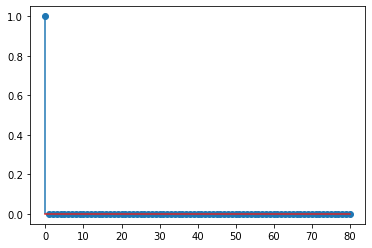

In [17]:
zmean13 = DS['zmean']
wmean13 = DS['wmean']
zmean13[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean13)
wmean13[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean13[0]))

# Diffusion 2

In [18]:
xdts = xzs20

In [19]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[10.0],[15.0],[16.0],[20.0],[39.0],[50.0],[51.0],[52.0],[57.0],[70.0],[73.0],[81.0]]), 'Value': matlab.double([[0.9863877235342399],[0.1789696288868821],[1.2126479352123791],[0.027799401226600916],[-0.008110598775003393],[13.06618091201545],[0.6080261937592515],[8.55764887631481],[-0.5359061184082317],[-26.94846828259613],[-0.31954538263831705],[27.12007419340602],[946.9765652762065]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [21]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_12148/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_12148/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_12148/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))


Iteration = 0  log(Likelihood) = 8127.5447930044575


C:\Users\USER\AppData\Local\Temp/ipykernel_12148/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_12148/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = 8186.536195892144
Iteration = 2  log(Likelihood) = 8186.537584740578
Iteration = 3  log(Likelihood) = 8186.537584830137
{'zmean': array([1.00000000e+00, 4.35228545e-34, 1.86407851e-22, 2.08589949e-34,
       1.87572219e-22, 4.52267138e-34, 1.89351995e-22, 3.54356042e-34,
       1.91190886e-22, 1.00000000e+00, 1.40363983e-26, 0.00000000e+00,
       1.97031345e-25, 0.00000000e+00, 2.57159455e-24, 1.00000000e+00,
       3.05353897e-23, 1.29388354e-27, 1.90856511e-22, 5.27069956e-24,
       1.91596014e-22, 2.49168852e-24, 1.92086539e-22, 4.98654542e-24,
       1.92576719e-22, 1.91300789e-22, 1.92866757e-22, 1.91971730e-22,
       1.92869838e-22, 1.91736171e-22, 1.92872672e-22, 1.92216075e-22,
       1.92874421e-22, 3.11465102e-24, 1.91277355e-22, 8.96335892e-26,
       1.91716366e-22, 1.89265320e-24, 1.92145486e-22, 4.99544522e-24,
       1.92534582e-22, 1.91801334e-22, 1.92869763e-22, 1.92146198e-22,
       1.92871408e-22, 1.92067636e-22, 1.92873268e-22, 1


0.9906794734779988


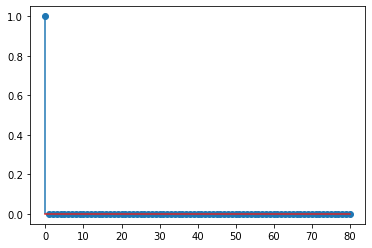

In [24]:
zmean12 = DS['zmean']
wmean12 = DS['wmean']
zmean12[np.where(np.diag(DS['wCOV'])>3e-4)] = 0
plt.stem(zmean12)
wmean12[np.where(np.diag(DS['wCOV'])>3e-4)] = 0
print()
print(np.sqrt(wmean12[0]))

# Diffusion 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.0001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run

    y35 = []
    y36 = []
    y37 = []
    y38 = []
    y39 = []
    y40 = []
    y41 = []
    y42 = []
    
    xz19 = []
    xz20 = []
    
    xzs19 = []
    xzs20 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
                         
        y37.append(x[-37,:])         # 
        y38.append(x[-38,:])
        y39.append(x[-39,:])         #
        y40.append(x[-40,:])
        y41.append(x[-41,:])         #
        y42.append(x[-42,:])

        
        zint19 = x[-41, 0:-1]        # Velocity
        xfinal19 = x[-41, 1:] 
        xmz19 = (xfinal19 - zint19)
        

        xz19.append(xmz19)
        
        xmzsq19 = np.multiply(xmz19, xmz19)
        xzs19.append(xmzsq19)

    xz19 = pow(dt,-1)*np.mean(np.array(xz19), axis = 0)

    xzs19 = pow(dt,-1)*np.mean(np.array(xzs19), axis = 0)

    y37 = np.array(y37)
    y38 = np.array(y38)
    y39 = np.array(y39)
    y40 = np.array(y40)
    y41 = np.array(y41)
    y42 = np.array(y42)

    time = t[0:-1]
    return xz19, xzs19, y37, y38, y39, y40, y41, y42, time

In [4]:
import time
start = time.time()
xz19, xzs19, y37, y38, y39, y40, y41, y42, time_ = M_DOF_sys(x_initial, dof, T)
end = time.time()
print()
TIMES = (end - start)/60
TIMES

14.78854931195577

In [5]:
startD = time.time()
# Expected Dictionary Creation:
libr = []
for j in range(len(y37)):
    data = np.row_stack((y37[j,0:-1], y38[j,0:-1], y39[j,0:-1], y40[j,0:-1], y41[j,0:-1], y42[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
print()
endD = time.time()
TIMED = (endD - startD)/60
TIMED

3.0152697443962095

In [11]:
xdts = xzs19
D = Dictionary

In [13]:
Dict = D.reshape(-1,order='F')
Dict.shape

(490000,)

In [14]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[13.0],[16.0],[17.0],[18.0],[25.0],[31.0]]), 'Value': matlab.double([[0.9911631499197776],[11.7442354204679],[0.14516210033526056],[-11.893665126435351],[0.4469881333734123],[76.16620332698977],[-2.8032948609811044]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [18]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_11628/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_11628/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_11628/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_11628/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_11628/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 0  log(Likelihood) = 7850.343734833558
Iteration = 1  log(Likelihood) = 7888.016536002489
Iteration = 2  log(Likelihood) = 7888.016839724968
Iteration = 3  log(Likelihood) = 7888.016839732196
{'zmean': array([1.00000000e+00, 3.95387590e-44, 1.82093701e-22, 5.48792084e-39,
       1.85149437e-22, 2.38369789e-37, 1.89342882e-22, 0.00000000e+00,
       2.02039391e-25, 0.00000000e+00, 2.49208860e-24, 0.00000000e+00,
       1.00000000e+00, 1.77997657e-31, 1.91224714e-22, 8.86836115e-26,
       1.91951257e-22, 5.95137872e-25, 1.92475919e-22, 1.91459044e-22,
       1.92869403e-22, 1.91447838e-22, 1.92871603e-22, 1.91548478e-22,
       1.92873822e-22, 7.95810441e-26, 1.91252542e-22, 1.97233980e-29,
       1.91810485e-22, 7.63526431e-25, 1.92434831e-22, 1.91907799e-22,
       1.92871562e-22, 1.91844427e-22, 1.92872081e-22, 1.91944053e-22,
       1.92873945e-22, 1.80276049e-24, 1.91326251e-22, 9.76498913e-25,
       1.91926883e-22, 2.19890277e-27, 1.92502724e-22, 1.92445848e-22,
     


1.0203663496547075


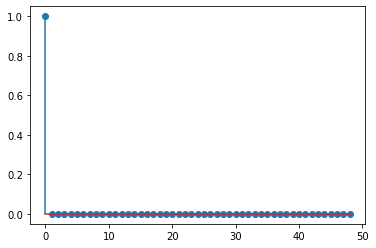

In [20]:
zmean1 = DS['zmean']
wmean1 = DS['wmean']
zmean1[np.where(np.diag(DS['wCOV'])>2e-5)] = 0
plt.stem(zmean1)
wmean1[np.where(np.diag(DS['wCOV'])>2e-5)] = 0
print()
print(np.sqrt(wmean1[0]))